In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
sys.path.insert(0, str(Path.cwd().parent))
import scripts.eda_toolkit as eda
import mlflow
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [2]:
RANDOM_STATE = 8

home = Path.cwd().parent
data_dir = home / "data"
notebook_dir = home / "notebooks"
df = pd.read_csv(data_dir / "processed" / "german_credit.csv")
sklearn.set_config(transform_output="pandas")

* no null values
* 20 features (19 predictors, 1 target)

In [3]:

X_temp, X_test, y_temp, y_test = train_test_split(
    df.drop(columns=["class"]),
    df["class"],
    test_size=0.15,
    random_state=RANDOM_STATE,
    stratify=df["class"]
)

X_temp.shape, y_temp.shape

((850, 20), (850,))

In [4]:
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=len(X_test),
    random_state=RANDOM_STATE,
    stratify=y_temp
) 
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((700, 20), (700,), (150, 20), (150,))

### Create a copy of the datset

In [31]:
train_df = X_train.copy()
train_df.shape

(700, 20)

In [6]:
y_train.value_counts(normalize=True)

class
1    0.7
0    0.3
Name: proportion, dtype: float64

In [12]:
train_df.head()

,checking_account_status,duration_months,credit_history,purpose,credit_amount,savings_account_bonds,present_employment_since,property,age_years,other_installment_plans,housing,job
135,no checking account,12,critical/other credits exist,radio/television,1240,unknown/no savings account,>= 7 years,real estate,38,none,own,skilled employee/official
16,no checking account,24,critical/other credits exist,radio/television,2424,unknown/no savings account,>= 7 years,bldg society/life ins.,53,none,own,skilled employee/official
341,< 0 DM,21,existing credits paid duly,furniture/equipment,3599,< 100 DM,4 <= ... < 7 years,car or other,26,none,rent,unskilled resident
569,< 0 DM,48,existing credits paid duly,radio/television,6758,< 100 DM,1 <= ... < 4 years,car or other,31,none,own,skilled employee/official
752,0 <= ... < 200 DM,12,existing credits paid duly,business,841,100 <= ... < 500 DM,4 <= ... < 7 years,real estate,23,none,rent,unskilled resident


### Categorical features

In [32]:
train_df = FeatureEngineer().transform(train_df)


  UNIVARIATE ANALYSIS: checking_account_status

--- Basic Statistics ---
  Count:        700
  Missing:      0 (0.0%)
  Unique:       4
  Mode:         no checking account (279 occurrences, 39.9%)

--- Distribution Metrics ---
  Entropy:      1.7900 (max possible: 2.0000)
  Gini Index:   0.6904

--- Value Counts ---
  no checking account       279 ( 39.9%) ███████████████████
  0 <= ... < 200 DM         191 ( 27.3%) █████████████
  < 0 DM                    189 ( 27.0%) █████████████
  >= 200 DM / salary assign.       41 (  5.9%) ██


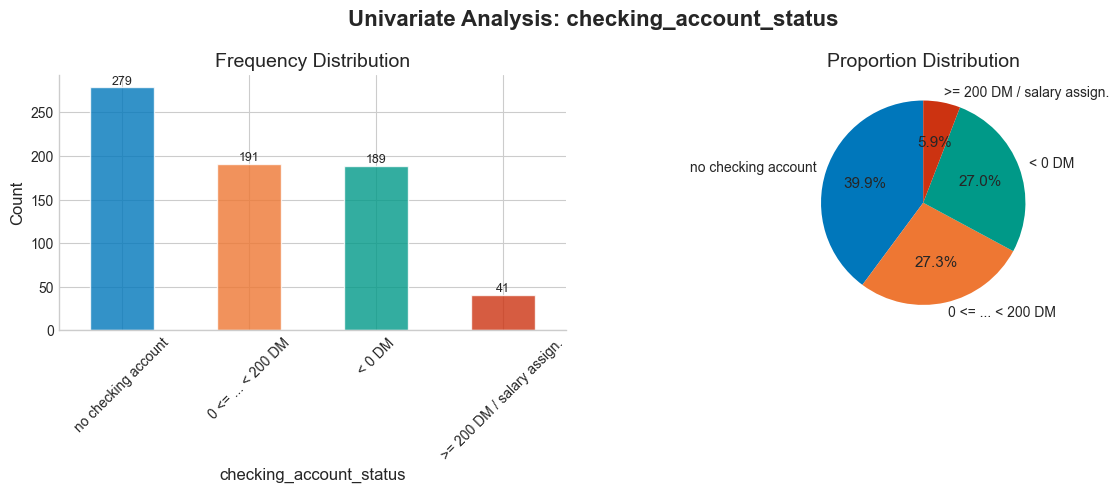


  BIVARIATE ANALYSIS: checking_account_status vs class

--- Contingency Table (Counts) ---
class                        0    1
checking_account_status            
0 <= ... < 200 DM           72  119
< 0 DM                      95   94
>= 200 DM / salary assign.  10   31
no checking account         33  246

--- Contingency Table (Row %) ---
class                          0     1
checking_account_status               
0 <= ... < 200 DM           37.7  62.3
< 0 DM                      50.3  49.7
>= 200 DM / salary assign.  24.4  75.6
no checking account         11.8  88.2

--- Chi-Square Test of Independence ---
  Chi-square statistic: 86.8330
  Degrees of freedom:   3
  p-value:              1.0487e-18
  Significant (α=0.05): Yes ✓
  Cramér's V:           0.3522 (medium association)

--- Assumption Check ---
  Min expected frequency: 12.30
  Cells with expected < 5: 0.0%
  ✓ Assumption met (all expected frequencies >= 5)


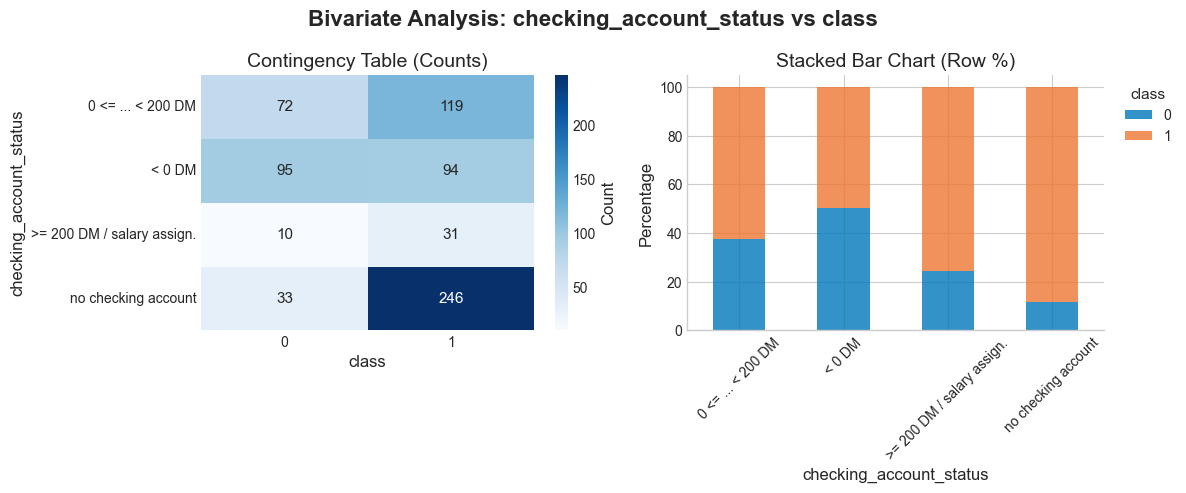


  UNIVARIATE ANALYSIS: credit_history

--- Basic Statistics ---
  Count:        700
  Missing:      0 (0.0%)
  Unique:       4
  Mode:         existing credits paid duly (378 occurrences, 54.0%)

--- Distribution Metrics ---
  Entropy:      1.6147 (max possible: 2.0000)
  Gini Index:   0.6127

--- Value Counts ---
  existing credits paid duly      378 ( 54.0%) ███████████████████████████
  critical/other credits exist      198 ( 28.3%) ██████████████
  all credits paid           64 (  9.1%) ████
  delay in paying off in past       60 (  8.6%) ████


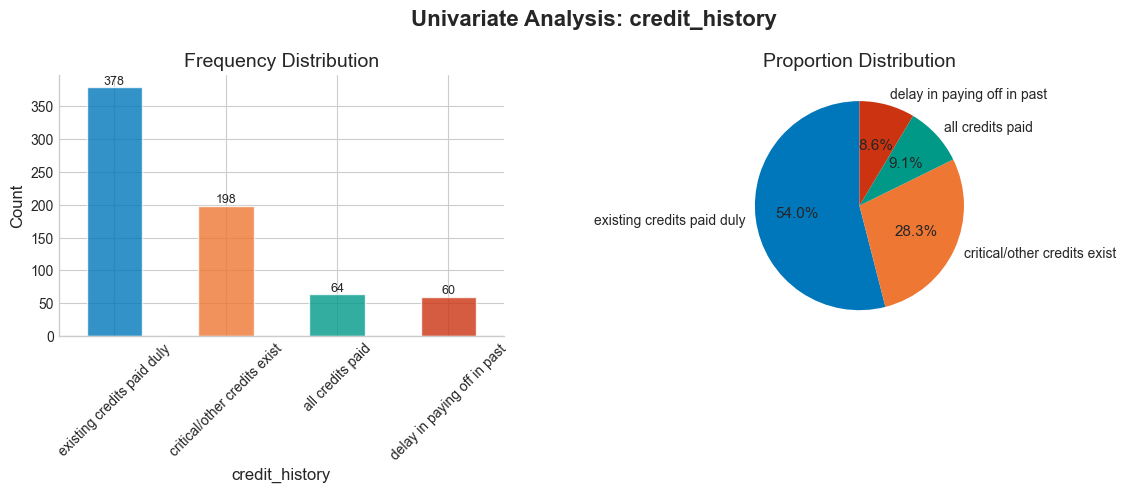


  BIVARIATE ANALYSIS: credit_history vs class

--- Contingency Table (Counts) ---
class                           0    1
credit_history                        
all credits paid               37   27
critical/other credits exist   38  160
delay in paying off in past    18   42
existing credits paid duly    117  261

--- Contingency Table (Row %) ---
class                            0     1
credit_history                          
all credits paid              57.8  42.2
critical/other credits exist  19.2  80.8
delay in paying off in past   30.0  70.0
existing credits paid duly    31.0  69.0

--- Chi-Square Test of Independence ---
  Chi-square statistic: 34.7516
  Degrees of freedom:   3
  p-value:              1.3747e-07
  Significant (α=0.05): Yes ✓
  Cramér's V:           0.2228 (small association)

--- Assumption Check ---
  Min expected frequency: 18.00
  Cells with expected < 5: 0.0%
  ✓ Assumption met (all expected frequencies >= 5)


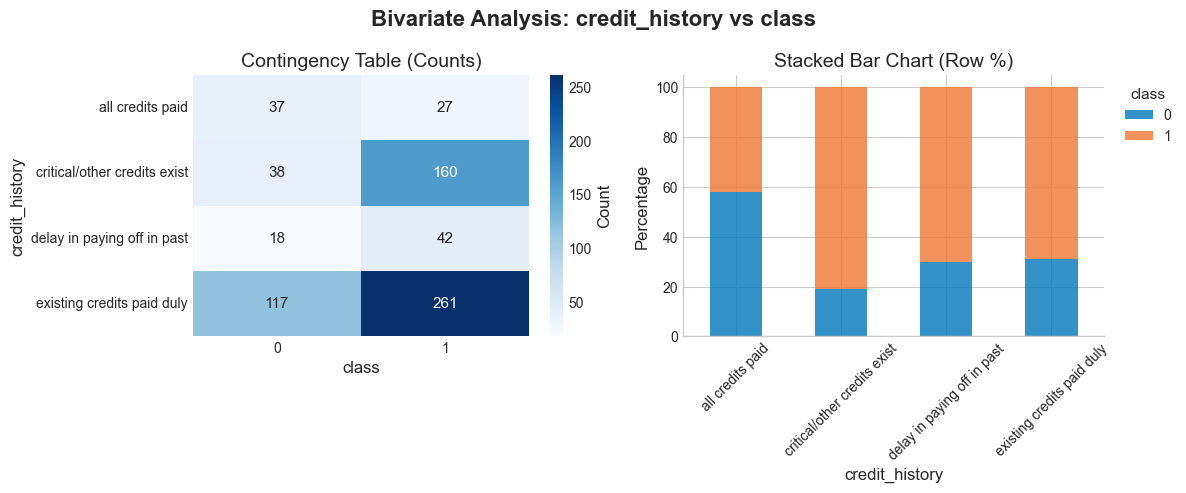


  UNIVARIATE ANALYSIS: purpose

--- Basic Statistics ---
  Count:        700
  Missing:      0 (0.0%)
  Unique:       7
  Mode:         radio/television (199 occurrences, 28.4%)

--- Distribution Metrics ---
  Entropy:      2.5510 (max possible: 2.8074)
  Gini Index:   0.8060

--- Value Counts ---
  radio/television          199 ( 28.4%) ██████████████
  car (new)                 169 ( 24.1%) ████████████
  furniture/equipment       122 ( 17.4%) ████████
  business                   68 (  9.7%) ████
  car (used)                 67 (  9.6%) ████
  personal_development       44 (  6.3%) ███
  home_improvement           31 (  4.4%) ██


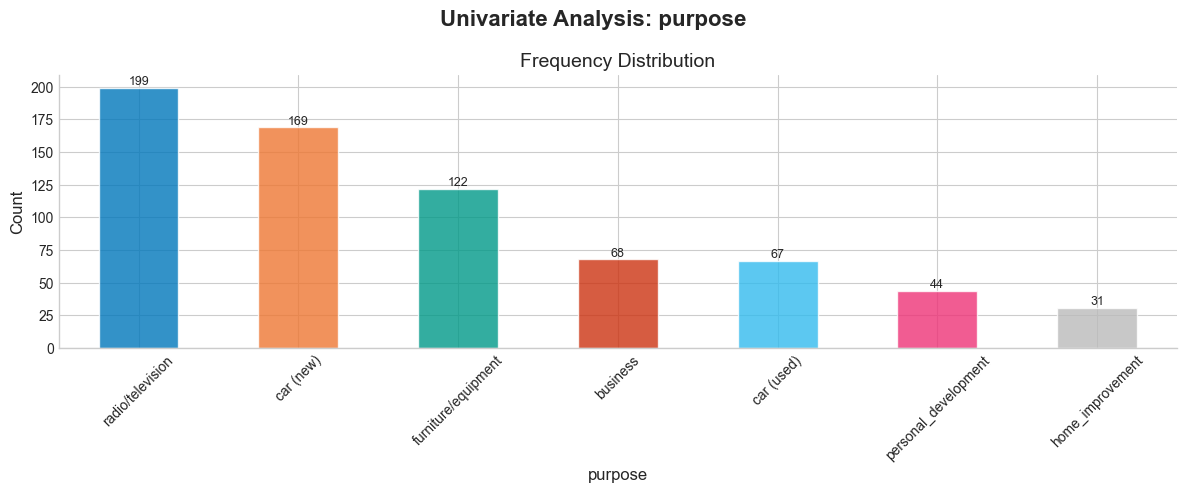


  BIVARIATE ANALYSIS: purpose vs class

--- Contingency Table (Counts) ---
class                  0    1
purpose                      
business              20   48
car (new)             61  108
car (used)            13   54
furniture/equipment   39   83
home_improvement      12   19
personal_development  18   26
radio/television      47  152

--- Contingency Table (Row %) ---
class                    0     1
purpose                         
business              29.4  70.6
car (new)             36.1  63.9
car (used)            19.4  80.6
furniture/equipment   32.0  68.0
home_improvement      38.7  61.3
personal_development  40.9  59.1
radio/television      23.6  76.4

--- Chi-Square Test of Independence ---
  Chi-square statistic: 14.2810
  Degrees of freedom:   6
  p-value:              2.6650e-02
  Significant (α=0.05): Yes ✓
  Cramér's V:           0.1428 (small association)

--- Assumption Check ---
  Min expected frequency: 9.30
  Cells with expected < 5: 0.0%
  ✓ Assumption met

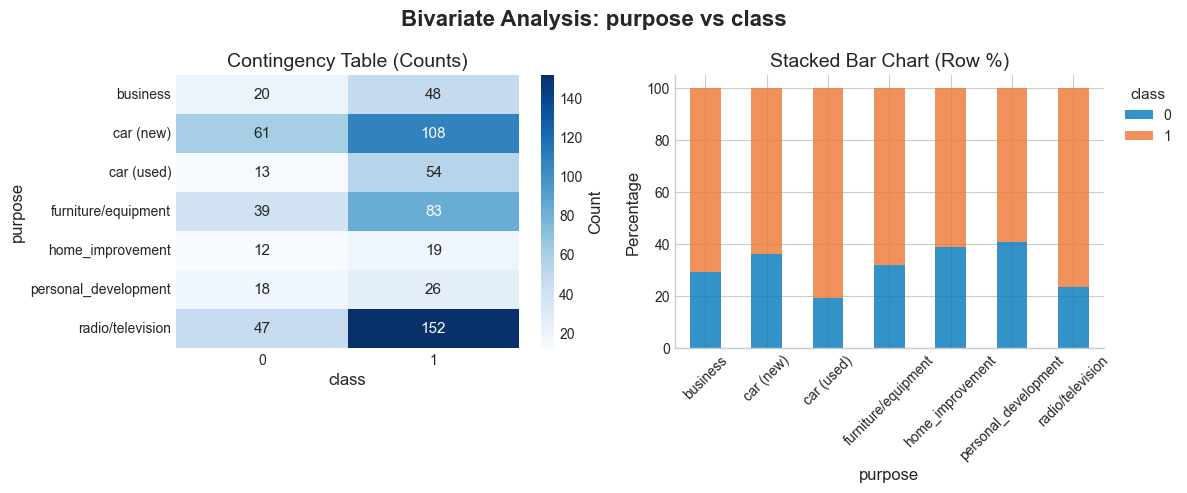


  UNIVARIATE ANALYSIS: savings_account_bonds

--- Basic Statistics ---
  Count:        700
  Missing:      0 (0.0%)
  Unique:       3
  Mode:         < 500 DM (482 occurrences, 68.9%)

--- Distribution Metrics ---
  Entropy:      1.1953 (max possible: 1.5850)
  Gini Index:   0.4750

--- Value Counts ---
  < 500 DM                  482 ( 68.9%) ██████████████████████████████████
  unknown/no savings account      133 ( 19.0%) █████████
  >= 500 DM                  85 ( 12.1%) ██████


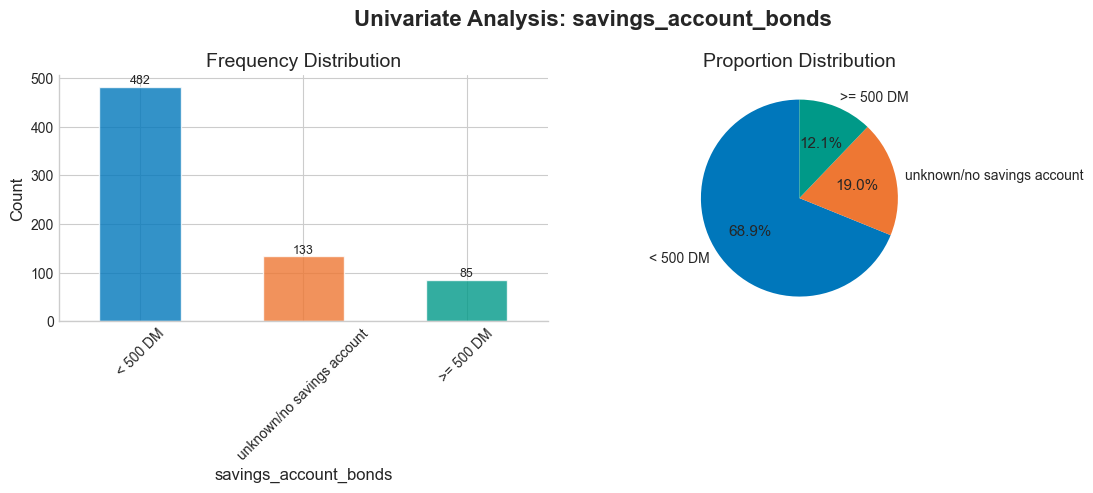


  BIVARIATE ANALYSIS: savings_account_bonds vs class

--- Contingency Table (Counts) ---
class                         0    1
savings_account_bonds               
< 500 DM                    177  305
>= 500 DM                    12   73
unknown/no savings account   21  112

--- Contingency Table (Row %) ---
class                          0     1
savings_account_bonds                 
< 500 DM                    36.7  63.3
>= 500 DM                   14.1  85.9
unknown/no savings account  15.8  84.2

--- Chi-Square Test of Independence ---
  Chi-square statistic: 33.3706
  Degrees of freedom:   2
  p-value:              5.6710e-08
  Significant (α=0.05): Yes ✓
  Cramér's V:           0.2183 (small association)

--- Assumption Check ---
  Min expected frequency: 25.50
  Cells with expected < 5: 0.0%
  ✓ Assumption met (all expected frequencies >= 5)


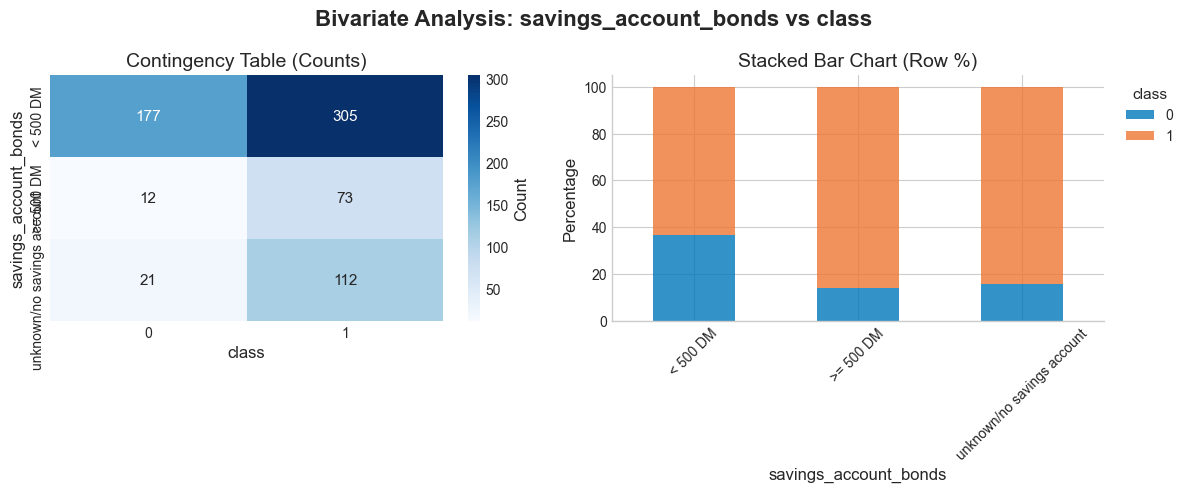


  UNIVARIATE ANALYSIS: present_employment_since

--- Basic Statistics ---
  Count:        700
  Missing:      0 (0.0%)
  Unique:       5
  Mode:         1 <= ... < 4 years (241 occurrences, 34.4%)

--- Distribution Metrics ---
  Entropy:      2.1588 (max possible: 2.3219)
  Gini Index:   0.7577

--- Value Counts ---
  1 <= ... < 4 years        241 ( 34.4%) █████████████████
  >= 7 years                168 ( 24.0%) ████████████
  4 <= ... < 7 years        131 ( 18.7%) █████████
  < 1 year                  115 ( 16.4%) ████████
  unemployed                 45 (  6.4%) ███


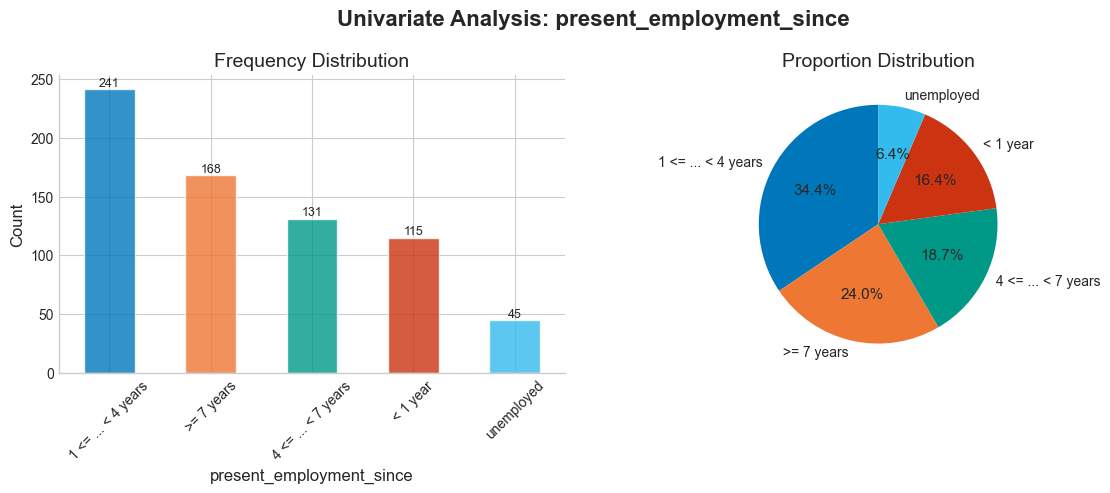


  BIVARIATE ANALYSIS: present_employment_since vs class

--- Contingency Table (Counts) ---
class                      0    1
present_employment_since         
1 <= ... < 4 years        76  165
4 <= ... < 7 years        29  102
< 1 year                  46   69
>= 7 years                45  123
unemployed                14   31

--- Contingency Table (Row %) ---
class                        0     1
present_employment_since            
1 <= ... < 4 years        31.5  68.5
4 <= ... < 7 years        22.1  77.9
< 1 year                  40.0  60.0
>= 7 years                26.8  73.2
unemployed                31.1  68.9

--- Chi-Square Test of Independence ---
  Chi-square statistic: 10.4561
  Degrees of freedom:   4
  p-value:              3.3407e-02
  Significant (α=0.05): Yes ✓
  Cramér's V:           0.1222 (small association)

--- Assumption Check ---
  Min expected frequency: 13.50
  Cells with expected < 5: 0.0%
  ✓ Assumption met (all expected frequencies >= 5)


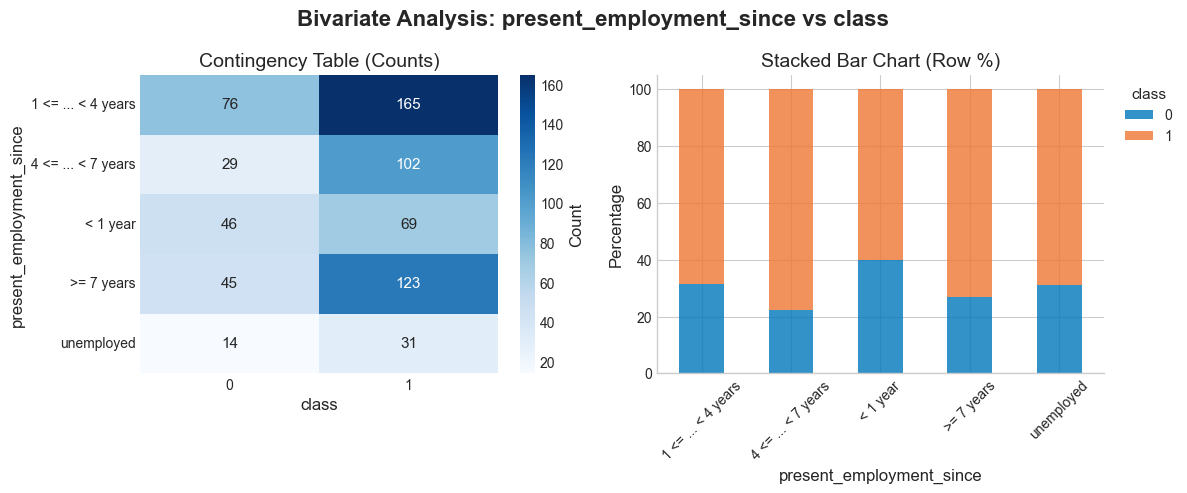


  UNIVARIATE ANALYSIS: property

--- Basic Statistics ---
  Count:        700
  Missing:      0 (0.0%)
  Unique:       4
  Mode:         car or other (224 occurrences, 32.0%)

--- Distribution Metrics ---
  Entropy:      1.9535 (max possible: 2.0000)
  Gini Index:   0.7347

--- Value Counts ---
  car or other              224 ( 32.0%) ████████████████
  real estate               202 ( 28.9%) ██████████████
  bldg society/life ins.      164 ( 23.4%) ███████████
  unknown/no property       110 ( 15.7%) ███████


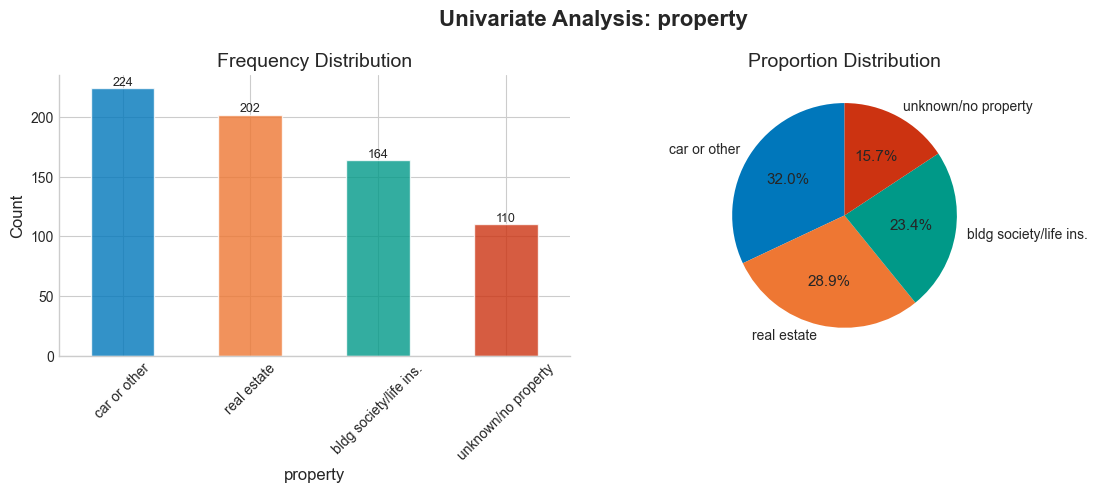


  BIVARIATE ANALYSIS: property vs class

--- Contingency Table (Counts) ---
class                    0    1
property                       
bldg society/life ins.  47  117
car or other            66  158
real estate             47  155
unknown/no property     50   60

--- Contingency Table (Row %) ---
class                      0     1
property                          
bldg society/life ins.  28.7  71.3
car or other            29.5  70.5
real estate             23.3  76.7
unknown/no property     45.5  54.5

--- Chi-Square Test of Independence ---
  Chi-square statistic: 17.0422
  Degrees of freedom:   3
  p-value:              6.9277e-04
  Significant (α=0.05): Yes ✓
  Cramér's V:           0.1560 (small association)

--- Assumption Check ---
  Min expected frequency: 33.00
  Cells with expected < 5: 0.0%
  ✓ Assumption met (all expected frequencies >= 5)


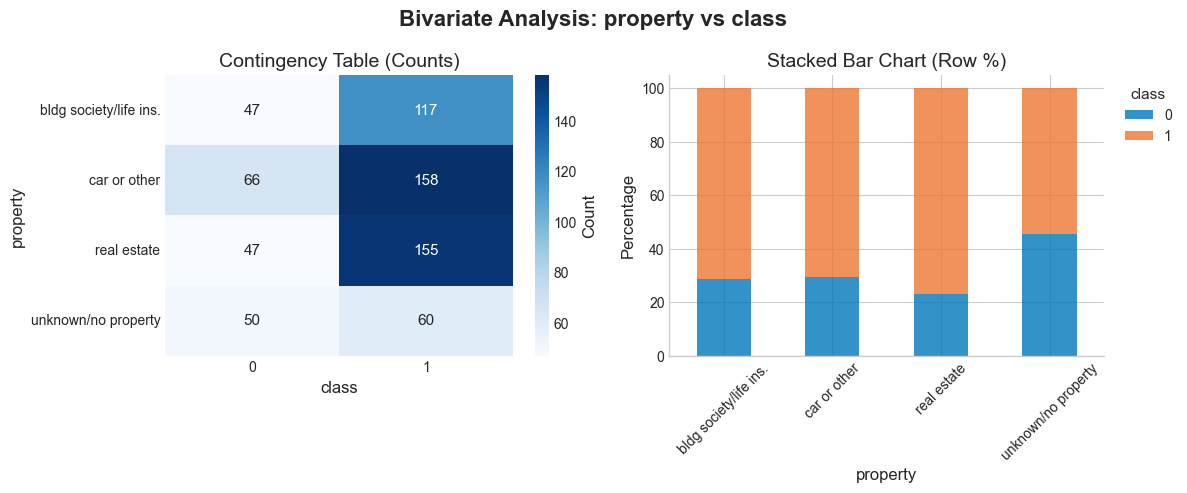


  UNIVARIATE ANALYSIS: other_installment_plans

--- Basic Statistics ---
  Count:        700
  Missing:      0 (0.0%)
  Unique:       3
  Mode:         none (567 occurrences, 81.0%)

--- Distribution Metrics ---
  Entropy:      0.8655 (max possible: 1.5850)
  Gini Index:   0.3225

--- Value Counts ---
  none                      567 ( 81.0%) ████████████████████████████████████████
  bank                       95 ( 13.6%) ██████
  stores                     38 (  5.4%) ██


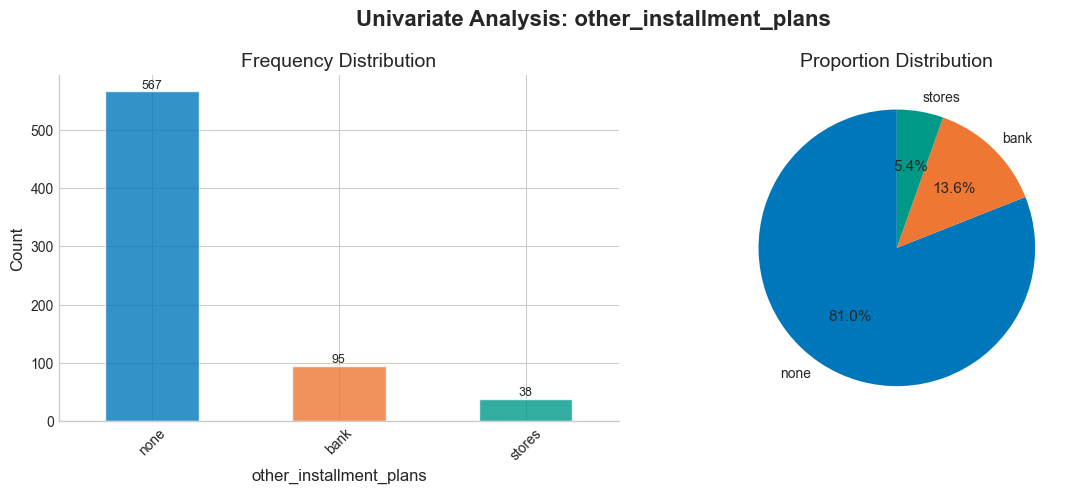


  BIVARIATE ANALYSIS: other_installment_plans vs class

--- Contingency Table (Counts) ---
class                      0    1
other_installment_plans          
bank                      39   56
none                     157  410
stores                    14   24

--- Contingency Table (Row %) ---
class                       0     1
other_installment_plans            
bank                     41.1  58.9
none                     27.7  72.3
stores                   36.8  63.2

--- Chi-Square Test of Independence ---
  Chi-square statistic: 7.8147
  Degrees of freedom:   2
  p-value:              2.0094e-02
  Significant (α=0.05): Yes ✓
  Cramér's V:           0.1057 (small association)

--- Assumption Check ---
  Min expected frequency: 11.40
  Cells with expected < 5: 0.0%
  ✓ Assumption met (all expected frequencies >= 5)


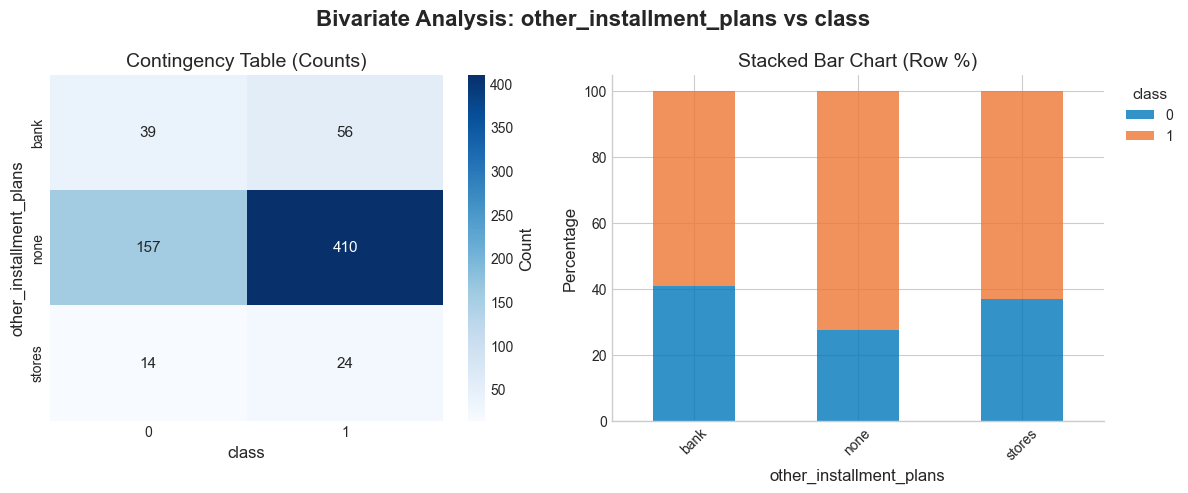


  UNIVARIATE ANALYSIS: housing

--- Basic Statistics ---
  Count:        700
  Missing:      0 (0.0%)
  Unique:       2
  Mode:         own (494 occurrences, 70.6%)

--- Distribution Metrics ---
  Entropy:      0.8742 (max possible: 1.0000)
  Gini Index:   0.4154

--- Value Counts ---
  own                       494 ( 70.6%) ███████████████████████████████████
  not_own                   206 ( 29.4%) ██████████████


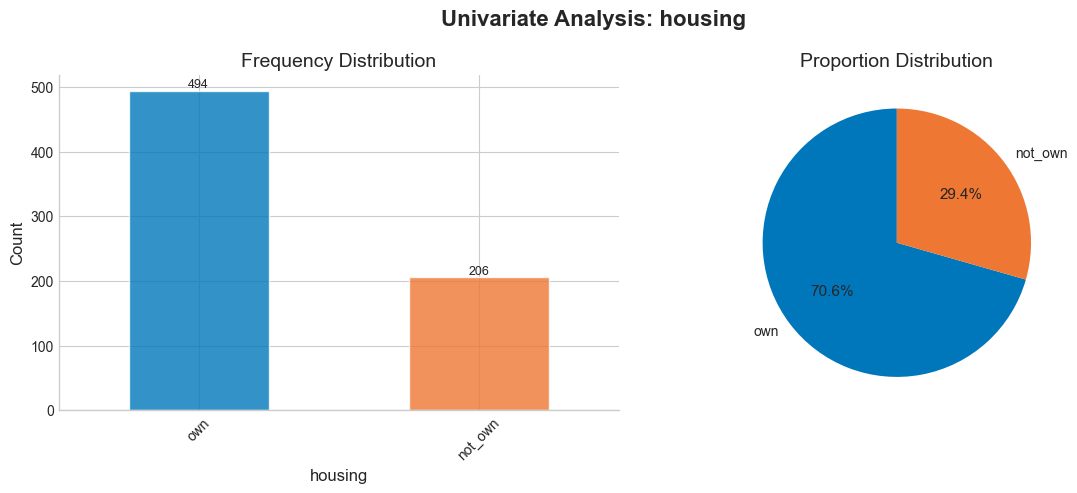


  BIVARIATE ANALYSIS: housing vs class

--- Contingency Table (Counts) ---
class      0    1
housing          
not_own   82  124
own      128  366

--- Contingency Table (Row %) ---
class       0     1
housing            
not_own  39.8  60.2
own      25.9  74.1

--- Chi-Square Test of Independence ---
  Chi-square statistic: 12.7121
  Degrees of freedom:   1
  p-value:              3.6330e-04
  Significant (α=0.05): Yes ✓
  Cramér's V:           0.1348 (small association)

--- Assumption Check ---
  Min expected frequency: 61.80
  Cells with expected < 5: 0.0%
  ✓ Assumption met (all expected frequencies >= 5)


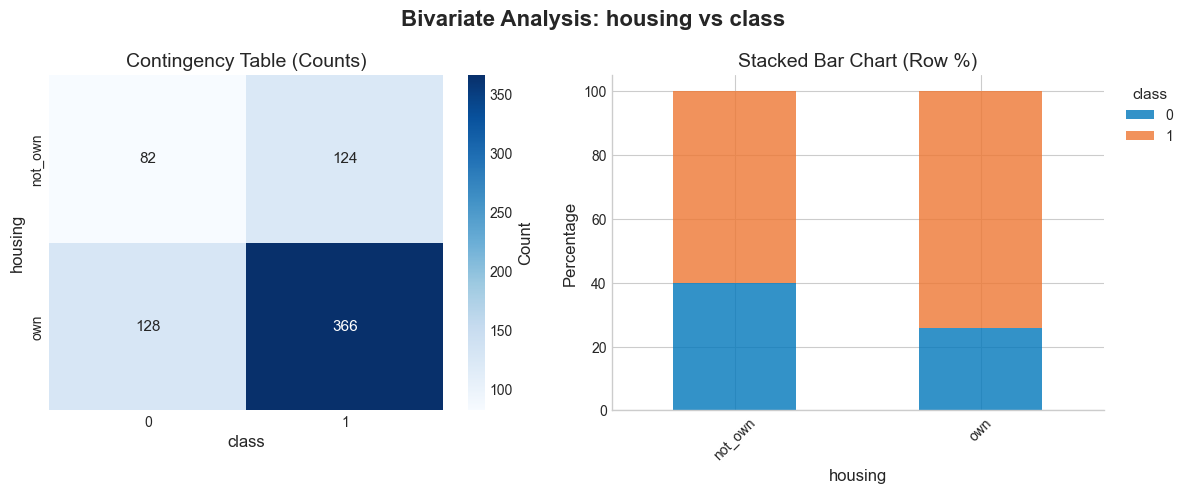


  UNIVARIATE ANALYSIS: job

--- Basic Statistics ---
  Count:        700
  Missing:      0 (0.0%)
  Unique:       4
  Mode:         skilled employee/official (436 occurrences, 62.3%)

--- Distribution Metrics ---
  Entropy:      1.4184 (max possible: 2.0000)
  Gini Index:   0.5467

--- Value Counts ---
  skilled employee/official      436 ( 62.3%) ███████████████████████████████
  unskilled resident        139 ( 19.9%) █████████
  management/self-employed/etc      112 ( 16.0%) ████████
  unemployed/unskilled non-res.       13 (  1.9%) 


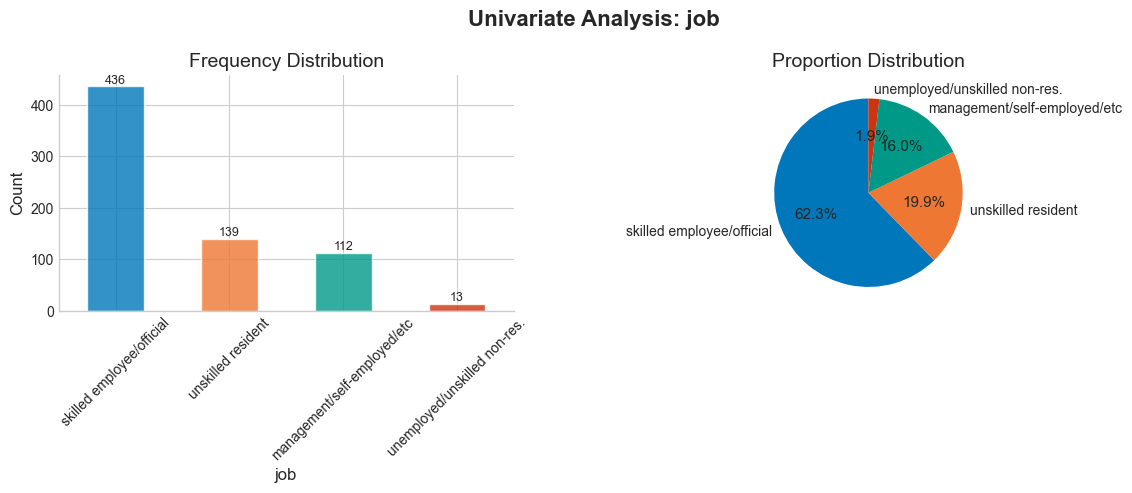


  BIVARIATE ANALYSIS: job vs class

--- Contingency Table (Counts) ---
class                            0    1
job                                    
management/self-employed/etc    35   77
skilled employee/official      133  303
unemployed/unskilled non-res.    4    9
unskilled resident              38  101

--- Contingency Table (Row %) ---
class                             0     1
job                                      
management/self-employed/etc   31.2  68.8
skilled employee/official      30.5  69.5
unemployed/unskilled non-res.  30.8  69.2
unskilled resident             27.3  72.7

--- Chi-Square Test of Independence ---
  Chi-square statistic: 0.6089
  Degrees of freedom:   3
  p-value:              8.9440e-01
  Significant (α=0.05): No ✗
  Cramér's V:           0.0295 (negligible association)

--- Assumption Check ---
  Min expected frequency: 3.90
  Cells with expected < 5: 12.5%
  ⚠️ Warning: Some expected frequencies are < 5. Results may be unreliable.
     Consider com

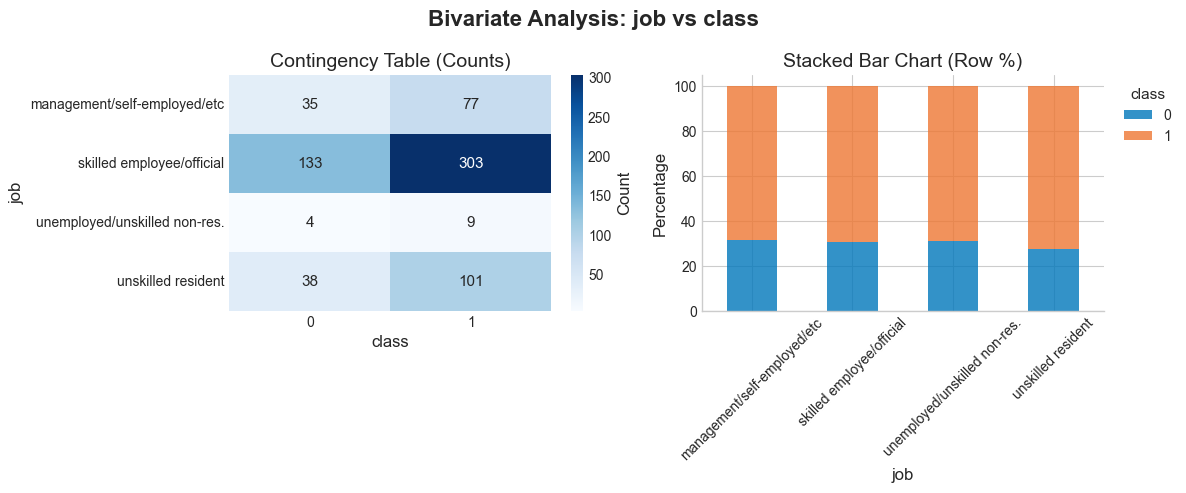


  UNIVARIATE ANALYSIS: monthly_burden

--- Descriptive Statistics ---
  Count:        700
  Missing:      0 (0.0%)
  Unique:       685
  Mean:         161.8703
  Median:       129.5208
  Std Dev:      112.8618
  CV:           69.72%

--- Distribution Shape ---
  Min:          25.2500
  Max:          1126.8333
  Range:        1101.5833
  IQR:          116.9990
  Skewness:     2.6010 (right-skewed)
  Kurtosis:     12.1899 (heavy tails / peaked)

--- Outliers (IQR Method) ---
  Lower bound:  -88.1850
  Upper bound:  379.8110
  Outliers:     30 (4.3%)

--- Normality Tests ---
  Shapiro-Wilk: W=0.7938, p=0.0000 ✗ Non-normal
  D'Agostino:   K²=431.9542, p=0.0000 ✗ Non-normal


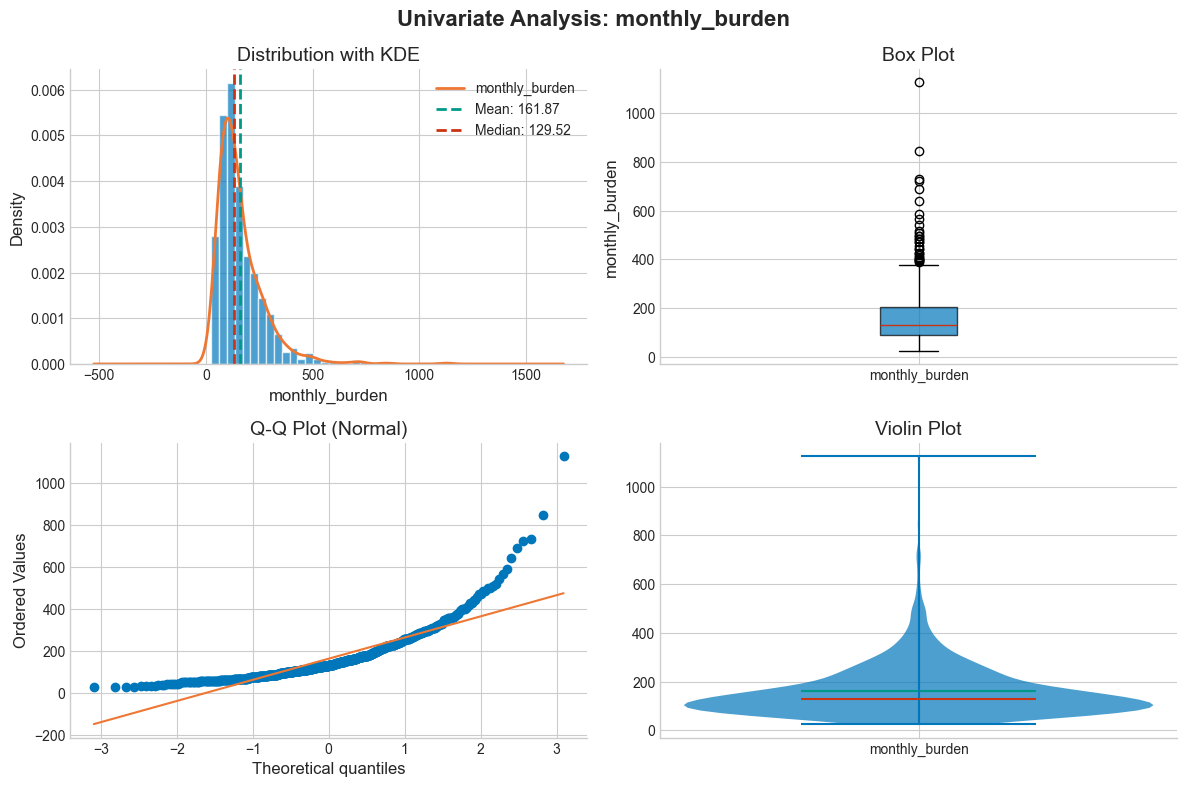


  BIVARIATE ANALYSIS: monthly_burden by class

--- Group Statistics ---
  Number of groups: 2
  Total observations: 700

       count        mean      median         std     min          max
class                                                                
0        210  154.405841  122.236905  116.110770  38.125   720.888889
1        490  165.069315  134.127778  111.407816  25.250  1126.833333

--- Statistical Test (Mann-Whitney U) ---
  Test type:           Non-parametric
  Statistic:           57747.5000
  p-value:             1.0218e-02
  Significant (α=0.05): Yes ✓
  Cohen's d:       0.0945 (small)

--- Assumption Check: Homogeneity of Variances (Levene's Test) ---
  Statistic:           0.1477
  p-value:             7.0088e-01
  Equal variances:     Yes ✓


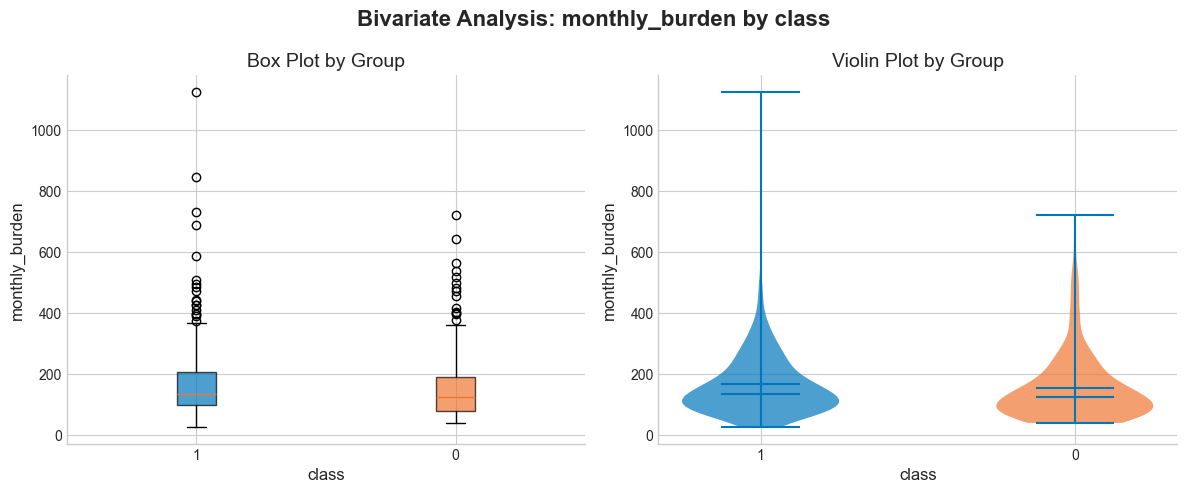


  UNIVARIATE ANALYSIS: duration_bins

--- Basic Statistics ---
  Count:        700
  Missing:      0 (0.0%)
  Unique:       5
  Mode:         very_short (245 occurrences, 35.0%)

--- Distribution Metrics ---
  Entropy:      2.0197 (max possible: 2.3219)
  Gini Index:   0.7198

--- Value Counts ---
  very_short                245 ( 35.0%) █████████████████
  medium                    244 ( 34.9%) █████████████████
  very_long                 114 ( 16.3%) ████████
  short                      52 (  7.4%) ███
  long                       45 (  6.4%) ███


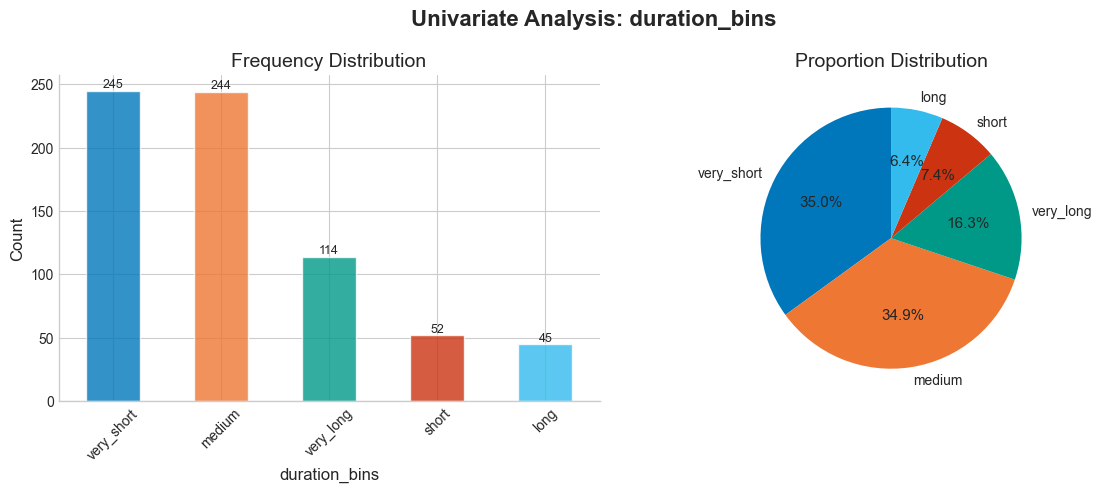


  BIVARIATE ANALYSIS: duration_bins vs class

--- Contingency Table (Counts) ---
class           0    1
duration_bins         
very_short     48  197
short          10   42
medium         81  163
long           12   33
very_long      59   55

--- Contingency Table (Row %) ---
class             0     1
duration_bins            
very_short     19.6  80.4
short          19.2  80.8
medium         33.2  66.8
long           26.7  73.3
very_long      51.8  48.2

--- Chi-Square Test of Independence ---
  Chi-square statistic: 42.6266
  Degrees of freedom:   4
  p-value:              1.2368e-08
  Significant (α=0.05): Yes ✓
  Cramér's V:           0.2468 (small association)

--- Assumption Check ---
  Min expected frequency: 13.50
  Cells with expected < 5: 0.0%
  ✓ Assumption met (all expected frequencies >= 5)

--- Contingency Table (Counts) ---
class           0    1
duration_bins         
very_short     48  197
short          10   42
medium         81  163
long           12   33
very_long 

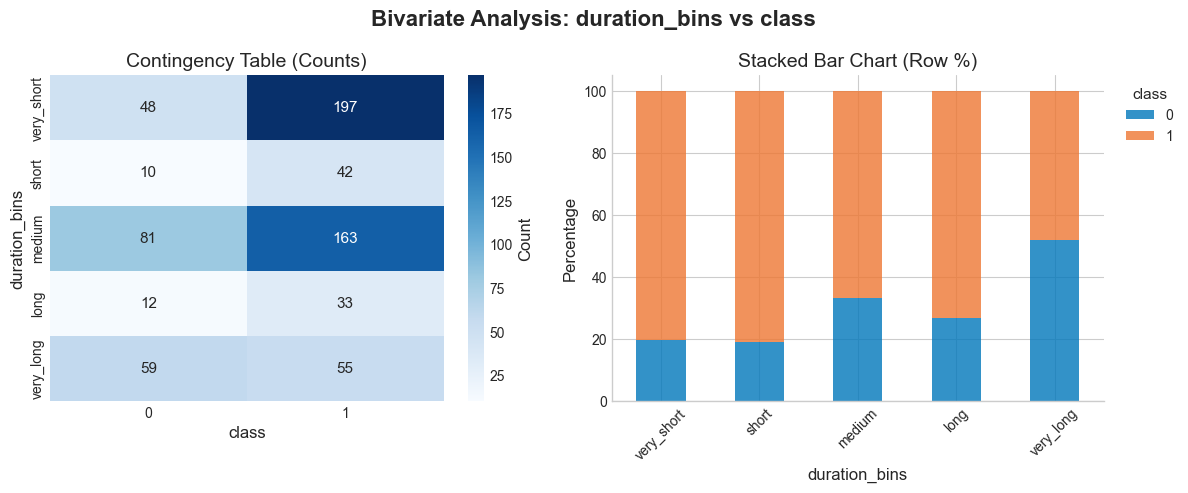


  UNIVARIATE ANALYSIS: credit_amount_bins

--- Basic Statistics ---
  Count:        700
  Missing:      0 (0.0%)
  Unique:       5
  Mode:         a (303 occurrences, 43.3%)

--- Distribution Metrics ---
  Entropy:      1.8687 (max possible: 2.3219)
  Gini Index:   0.6772

--- Value Counts ---
  a                         303 ( 43.3%) █████████████████████
  b                         237 ( 33.9%) ████████████████
  c                          85 ( 12.1%) ██████
  d                          47 (  6.7%) ███
  e                          28 (  4.0%) ██


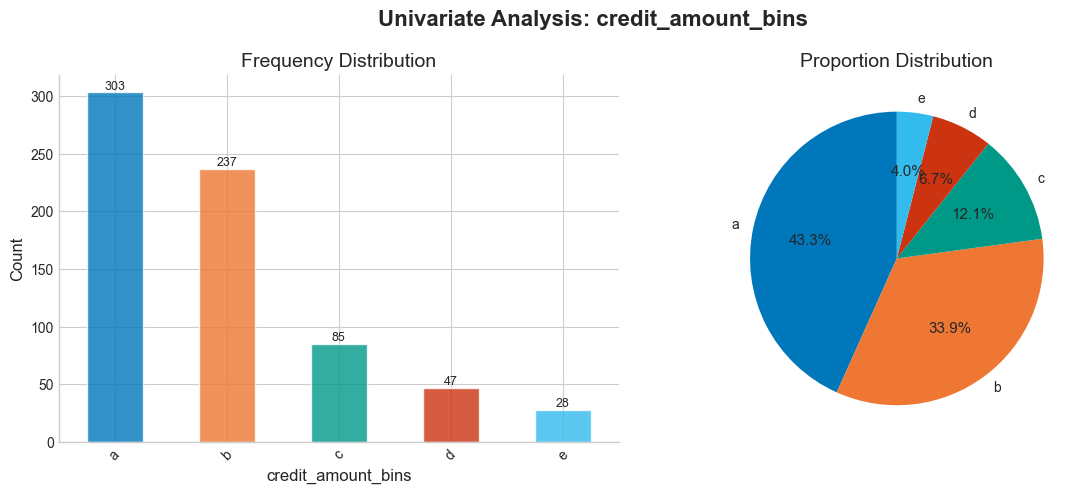


  BIVARIATE ANALYSIS: credit_amount_bins vs class

--- Contingency Table (Counts) ---
class                0    1
credit_amount_bins         
a                   84  219
b                   53  184
c                   37   48
d                   21   26
e                   15   13

--- Contingency Table (Row %) ---
class                  0     1
credit_amount_bins            
a                   27.7  72.3
b                   22.4  77.6
c                   43.5  56.5
d                   44.7  55.3
e                   53.6  46.4

--- Chi-Square Test of Independence ---
  Chi-square statistic: 26.9715
  Degrees of freedom:   4
  p-value:              2.0144e-05
  Significant (α=0.05): Yes ✓
  Cramér's V:           0.1963 (small association)

--- Assumption Check ---
  Min expected frequency: 8.40
  Cells with expected < 5: 0.0%
  ✓ Assumption met (all expected frequencies >= 5)


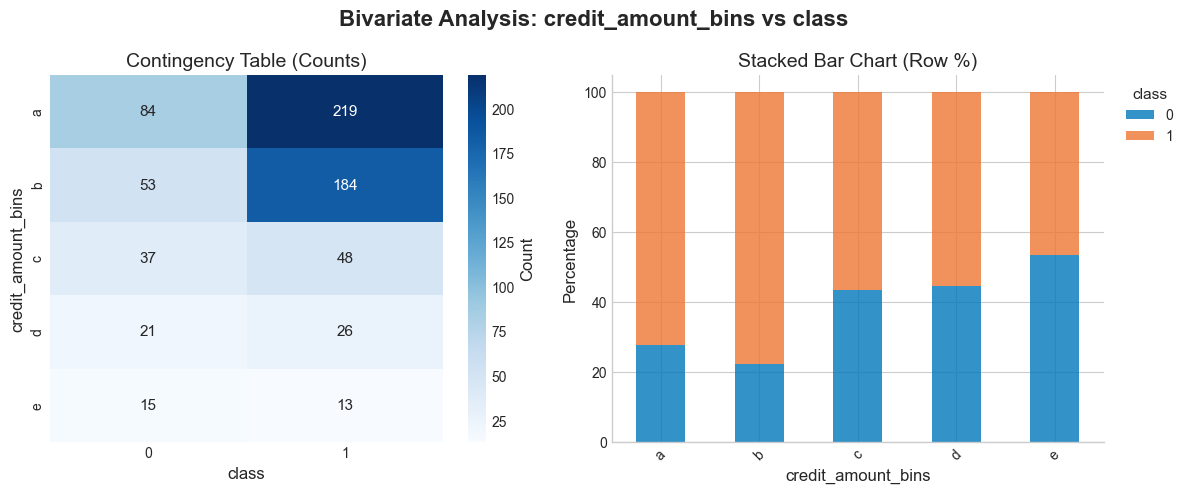


  UNIVARIATE ANALYSIS: age_group

--- Basic Statistics ---
  Count:        700
  Missing:      0 (0.0%)
  Unique:       4
  Mode:         Early_Career (290 occurrences, 41.4%)

--- Distribution Metrics ---
  Entropy:      1.7858 (max possible: 2.0000)
  Gini Index:   0.6831

--- Value Counts ---
  Early_Career              290 ( 41.4%) ████████████████████
  Prime                     226 ( 32.3%) ████████████████
  Young                     132 ( 18.9%) █████████
  Mature                     52 (  7.4%) ███


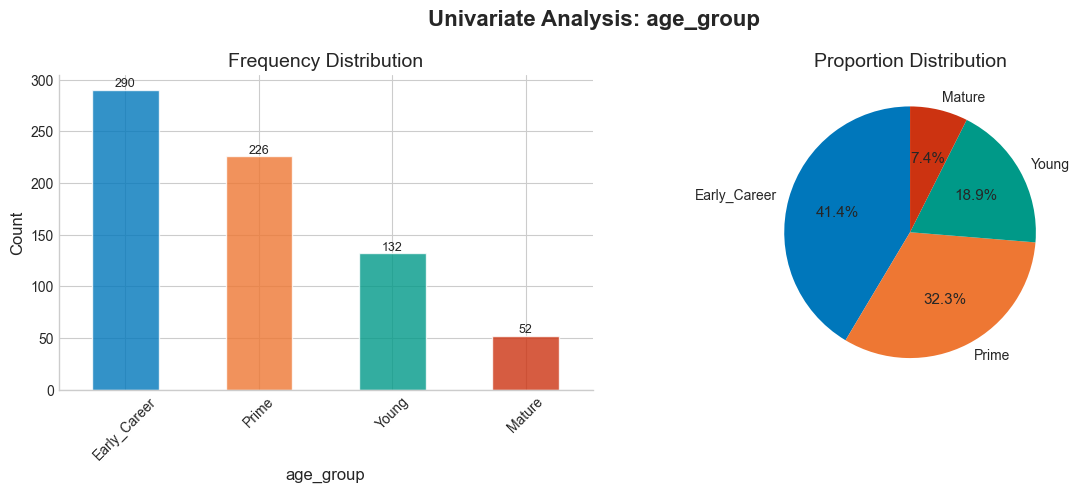


  BIVARIATE ANALYSIS: age_group vs class

--- Contingency Table (Counts) ---
class          0    1
age_group            
Young         51   81
Early_Career  84  206
Prime         62  164
Mature        13   39

--- Contingency Table (Row %) ---
class            0     1
age_group               
Young         38.6  61.4
Early_Career  29.0  71.0
Prime         27.4  72.6
Mature        25.0  75.0

--- Chi-Square Test of Independence ---
  Chi-square statistic: 6.1639
  Degrees of freedom:   3
  p-value:              1.0390e-01
  Significant (α=0.05): No ✗
  Cramér's V:           0.0938 (negligible association)

--- Assumption Check ---
  Min expected frequency: 15.60
  Cells with expected < 5: 0.0%
  ✓ Assumption met (all expected frequencies >= 5)


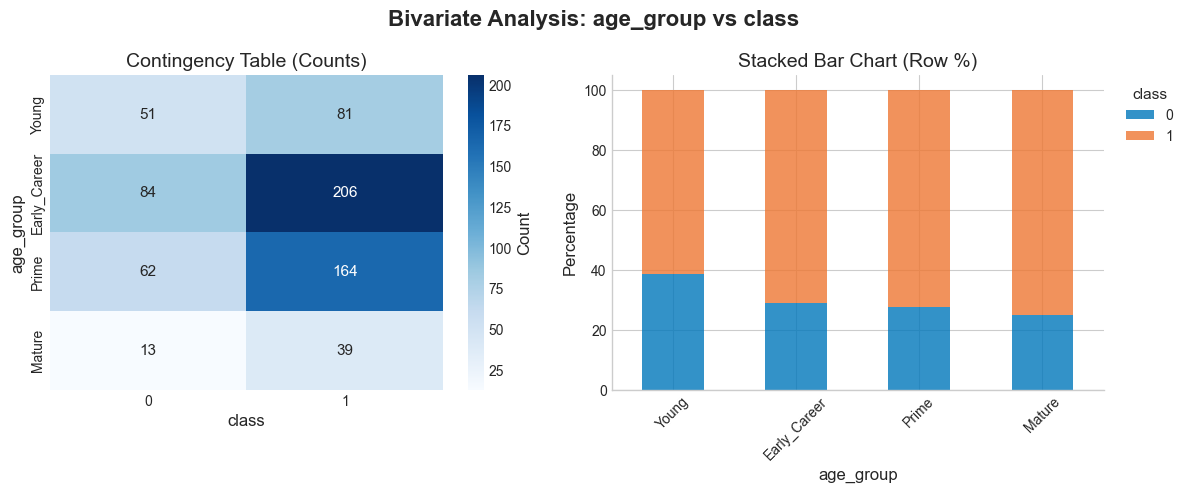

In [11]:
for col in train_df.columns:
    if train_df[col].dtype in [int, float]:
        eda.analyze_numerical(train_df[col])
        eda.analyze_categorical_numerical(y_train, train_df[col], parametric=False)
    else:
        eda.analyze_categorical(train_df[col])
        eda.analyze_categorical_categorical(train_df[col], y_train)

### Feature engineering

New features

In [8]:
from sklearn.model_selection import learning_curve
import tempfile
import os

def plot_learning_curve(model, X_train, y_train, cv=5, scoring='roc_auc', return_fig=False):
    """Generate learning curve plot.
    
    Parameters:
    -----------
    model : estimator - Model to evaluate
    X_train : array-like - Training features
    y_train : array-like - Training target
    cv : int - Number of cross-validation folds
    scoring : str - Scoring metric
    return_fig : bool - If True, returns figure object instead of showing it
    
    Returns:
    --------
    fig : matplotlib.figure.Figure (only if return_fig=True)
    """
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, cv=cv, scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 10), random_state=RANDOM_STATE
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(train_sizes, train_scores_mean, label='Training Score', color='blue')
    ax.plot(train_sizes, val_scores_mean, label='Validation Score', color='orange')
    ax.fill_between(train_sizes, train_scores_mean - train_std,
                     train_scores_mean + train_std, alpha=0.1, color='blue')
    ax.fill_between(train_sizes, val_scores_mean - val_std,
                     val_scores_mean + val_std, alpha=0.1, color='orange')
    ax.set_xlabel('Training Size')
    ax.set_ylabel(scoring.capitalize())
    ax.set_title(f'Learning Curve for {model.__class__.__name__}')
    ax.legend(loc='best')
    ax.grid()
    
    if return_fig:
        return fig
    else:
        plt.show()
        plt.close(fig)

In [38]:
recip = np.log1p(train_df['monthly_burden'])


  UNIVARIATE ANALYSIS: monthly_burden

--- Descriptive Statistics ---
  Count:        700
  Missing:      0 (0.0%)
  Unique:       685
  Mean:         4.9081
  Median:       4.8715
  Std Dev:      0.5982
  CV:           12.19%

--- Distribution Shape ---
  Min:          3.2677
  Max:          7.0281
  Range:        3.7604
  IQR:          0.8436
  Skewness:     0.1790 (approximately symmetric)
  Kurtosis:     -0.0146 (approximately normal tails)

--- Outliers (IQR Method) ---
  Lower bound:  3.2154
  Upper bound:  6.5900
  Outliers:     3 (0.4%)

--- Normality Tests ---
  Shapiro-Wilk: W=0.9963, p=0.1021 ✓ Normal
  D'Agostino:   K²=3.7426, p=0.1539 ✓ Normal


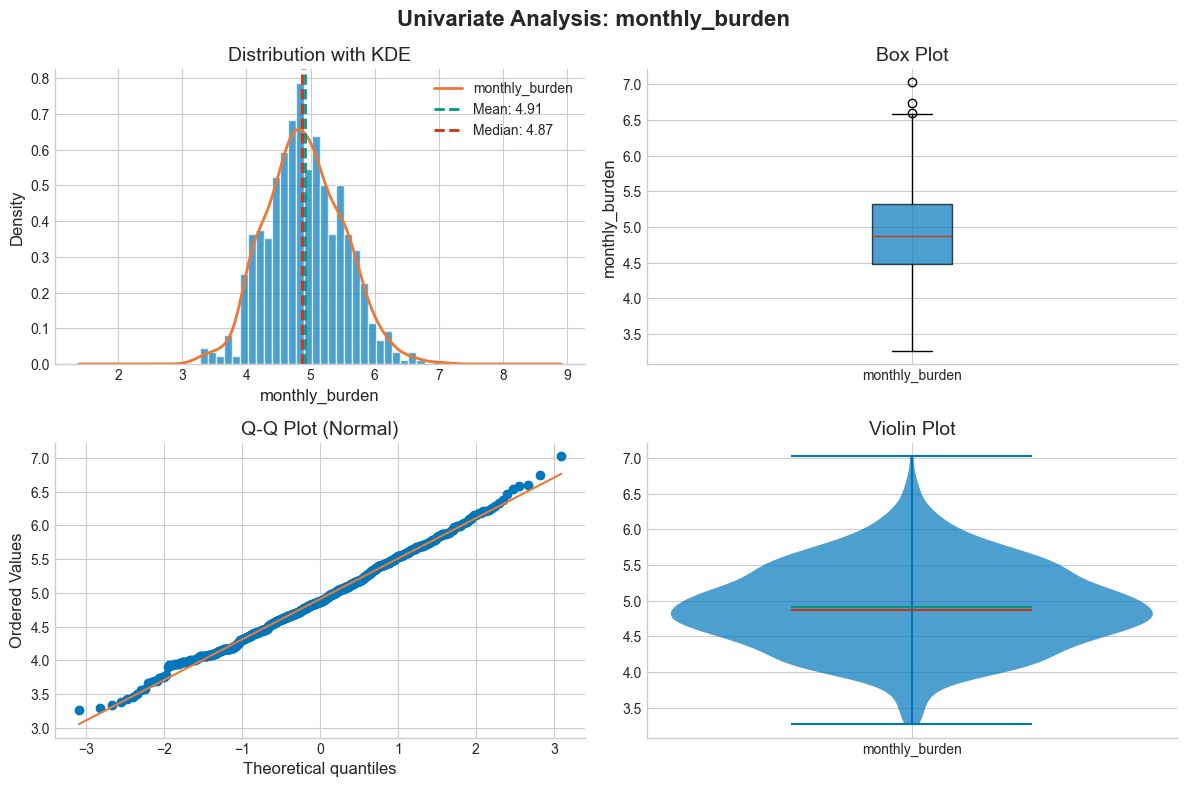

{'variable': 'monthly_burden',
 'count': 700,
 'missing': np.int64(0),
 'missing_pct': np.float64(0.0),
 'unique': 685,
 'mean': np.float64(4.908120396900088),
 'median': np.float64(4.871532232221645),
 'mode': np.float64(3.9781228071326695),
 'std': np.float64(0.5982000349385977),
 'variance': np.float64(0.35784328180053954),
 'min': np.float64(3.2676659890376327),
 'max': np.float64(7.02805366700417),
 'range': np.float64(3.7603876779665373),
 'iqr': np.float64(0.8436299725745267),
 'skewness': np.float64(0.1789884528157289),
 'kurtosis': np.float64(-0.014641732775602101),
 'cv': np.float64(12.187965790660186),
 'percentiles': {'1%': np.float64(3.5571392183644295),
  '5%': np.float64(4.000415317523065),
  '25%': np.float64(4.4808920177916995),
  '50%': np.float64(4.871532232221645),
  '75%': np.float64(5.324521990366226),
  '95%': np.float64(5.8836711336870255),
  '99%': np.float64(6.337213399013256)},
 'outliers_count': 3,
 'outliers_pct': 0.4285714285714286,
 'outlier_bounds': (np.

In [39]:
eda.analyze_numerical(recip)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from category_encoders import OneHotEncoder, WOEEncoder, CountEncoder
import pandas as pd
import numpy as np

class FeatureEngineer(BaseEstimator, TransformerMixin):
    """Custom transformer for creating new features and transforming existing ones."""
    
    def __init__(self):
        self.cols_to_drop = [
            "other_debtors_guarantors",
            "telephone",
            "foreign_worker",
            "present_residence_since",
            "existing_credits_count",
            "people_liable_for_maintenance",
            "installment_rate_pct_of_disp_income",
            "personal_status_sex",
        ]
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        
        # Drop unnecessary columns first (only if they exist)
        cols_to_drop_existing = [c for c in self.cols_to_drop if c in X.columns]
        X = X.drop(columns=cols_to_drop_existing)
        
        # Create new features (before dropping the source columns)
        X['monthly_burden'] = X['credit_amount'] / X['duration_months']
        
        # Create duration bins BEFORE dropping duration_months
        X['duration_bins'] = pd.qcut(X['duration_months'], q=5, labels=['very_short', 'short', 'medium', 'long', 'very_long'])
        
        # Merge purpose categories
        X['purpose'] = X['purpose'].replace(
            ['education', 'retraining'], 'personal_development'
        )
        X['purpose'] = X['purpose'].replace(
            ['domestic appliances', 'repairs', 'others'], 'home_improvement'
        )
        
        # Bin credit amount
        X['credit_amount_bins'] = pd.cut(
            X['credit_amount'],
            bins=[0, 2000, 4000, 7000, 10000, 50000],
            labels=['a', 'b', 'c', 'd', 'e']
        )
        
        # Merge savings categories
        X['savings_account_bonds'] = X['savings_account_bonds'].replace(
            ['< 100 DM', '100 <= ... < 500 DM'], '< 500 DM'
        )
        X['savings_account_bonds'] = X['savings_account_bonds'].replace(
            ['500 <= ... < 1000 DM', '>= 1000 DM'], '>= 500 DM'
        )
        
        # Create age groups BEFORE dropping age_years
        X['age_group'] = pd.cut(
            X['age_years'],
            bins=[0, 25, 35, 55, 100],
            labels=['Young', 'Early_Career', 'Prime', 'Mature']
        )
        
        # Merge housing categories
        X['housing'] = X['housing'].replace(['for free', 'rent'], 'not_own')

        # Merge credit history categories
        X['credit_history'] = X['credit_history'].replace(
            ['all credits here paid duly', 'no credits/all paid duly'], 'all credits paid'
        )
        
        # Drop original columns that were transformed (AFTER creating derived features)
        X = X.drop(columns=['duration_months', 'credit_amount', 'age_years'])

        return X


# Define column groups for encoding (output columns from FeatureEngineer)
one_hot_cols = [
    'credit_history',
    'purpose',
    'credit_amount_bins',
    'property',
    'duration_bins',
]

woe_cols = [
    'savings_account_bonds',
    'age_group',
    'other_installment_plans',
    'job'
]

count_cols = [
    'checking_account_status',
    'present_employment_since',
    'housing',
    ,
]

numeric_cols = [
    'monthly_burden',
]

# Create the encoding pipeline
encoding_pipeline = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(cols=one_hot_cols, use_cat_names=True), one_hot_cols),
        ('woe', WOEEncoder(cols=woe_cols), woe_cols),
        ('scaler', StandardScaler(), numeric_cols),
        ('count', CountEncoder(cols=count_cols, normalize=True), count_cols),
    ],
    remainder='drop'  # or 'passthrough' if you want to keep other columns
)


# Full pipeline combining feature engineering + encoding
full_pipeline = Pipeline([
    ('feature_engineer', FeatureEngineer()),
    ('encoder', encoding_pipeline)
])

In [22]:
train_df = X_train.copy()

In [23]:
train_df_enc = full_pipeline.fit_transform(train_df, y_train)

In [24]:
train_df_enc.columns

Index(['one_hot__purpose_radio/television',
       'one_hot__purpose_furniture/equipment', 'one_hot__purpose_business',
       'one_hot__purpose_car (new)', 'one_hot__purpose_personal_development',
       'one_hot__purpose_car (used)', 'one_hot__purpose_home_improvement',
       'one_hot__credit_amount_bins_a', 'one_hot__credit_amount_bins_b',
       'one_hot__credit_amount_bins_c', 'one_hot__credit_amount_bins_d',
       'one_hot__credit_amount_bins_e', 'one_hot__property_real estate',
       'one_hot__property_bldg society/life ins.',
       'one_hot__property_car or other',
       'one_hot__property_unknown/no property',
       'one_hot__duration_bins_very_short', 'one_hot__duration_bins_short',
       'one_hot__duration_bins_medium', 'one_hot__duration_bins_long',
       'one_hot__duration_bins_very_long', 'woe__savings_account_bonds',
       'woe__age_group', 'woe__other_installment_plans', 'woe__job',
       'scaler__monthly_burden', 'count__checking_account_status',
       'coun

In [25]:
train_df_enc['count__credit_history'].unique()

array([0.28285714, 0.54      , 0.09142857, 0.08571429])

In [27]:
train_df.head(1).T

,135
checking_account_status,no checking account
duration_months,12
credit_history,critical/other credits exist
purpose,radio/television
credit_amount,1240
savings_account_bonds,unknown/no savings account
present_employment_since,>= 7 years
installment_rate_pct_of_disp_income,4
personal_status_sex,female: div/sep/married
other_debtors_guarantors,none


In [29]:
train_df_enc.head(1).T

,135
one_hot__purpose_radio/television,1.000000
one_hot__purpose_furniture/equipment,0.000000
one_hot__purpose_business,0.000000
one_hot__purpose_car (new),0.000000
one_hot__purpose_personal_development,0.000000
one_hot__purpose_car (used),0.000000
one_hot__purpose_home_improvement,0.000000
one_hot__credit_amount_bins_a,1.000000
one_hot__credit_amount_bins_b,0.000000
one_hot__credit_amount_bins_c,0.000000


In [ ]:
from category_encoders import WOEEncoder, CountEncoder, 

MODEL COMPARISON - 5-Fold Cross Validation
Dataset shape: (700, 34)


────────────────────────────────────────
📊 Training: DummyClassifier
────────────────────────────────────────
   ROC-AUC:  0.5000 ± 0.0000
   Accuracy: 0.7000 ± 0.0000

   📈 Learning Curve:


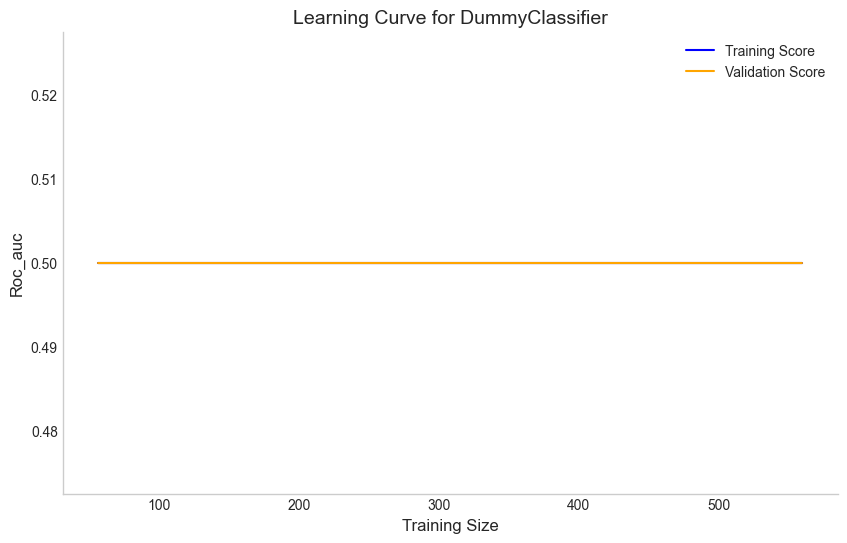


────────────────────────────────────────
📊 Training: LogisticRegression
────────────────────────────────────────
   ROC-AUC:  0.7883 ± 0.0285
   Accuracy: 0.7543 ± 0.0205

   📈 Learning Curve:


/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty'

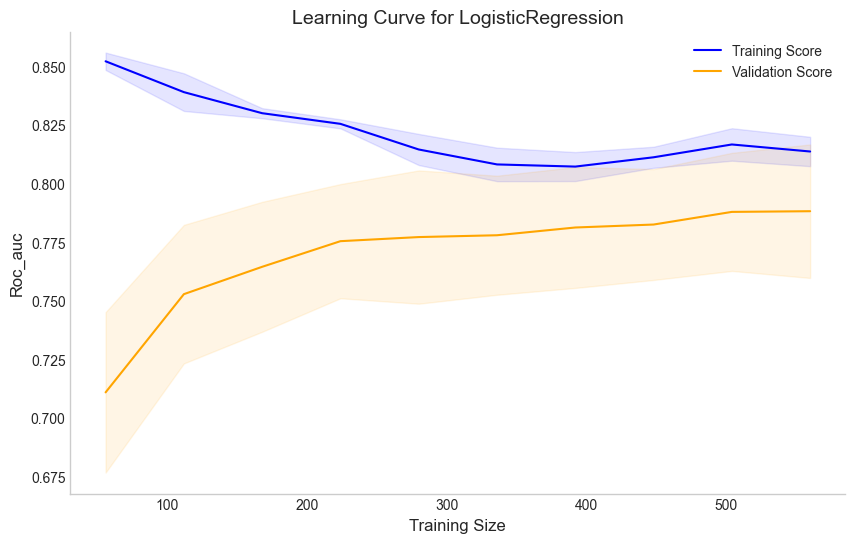


────────────────────────────────────────
📊 Training: SVC
────────────────────────────────────────
   ROC-AUC:  0.7860 ± 0.0300
   Accuracy: 0.7500 ± 0.0120

   📈 Learning Curve:
   ROC-AUC:  0.7860 ± 0.0300
   Accuracy: 0.7500 ± 0.0120

   📈 Learning Curve:


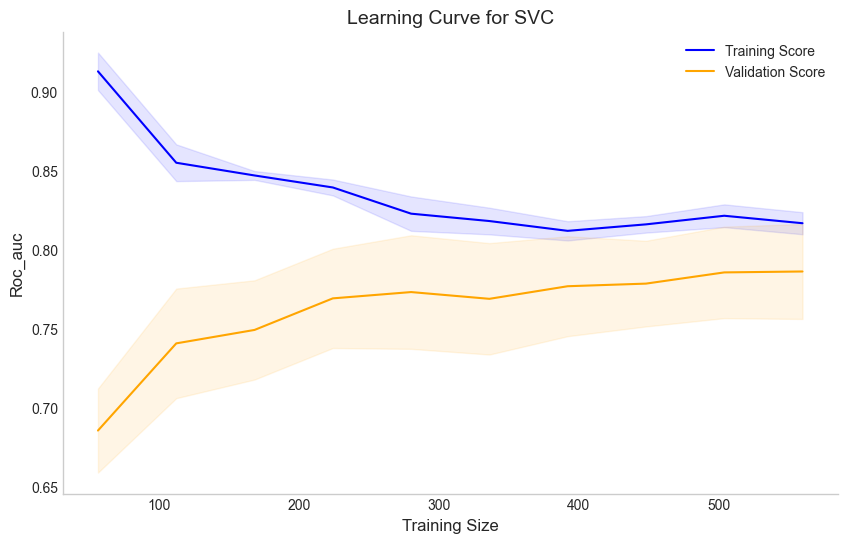


────────────────────────────────────────
📊 Training: RandomForest
────────────────────────────────────────
   ROC-AUC:  0.7665 ± 0.0378
   Accuracy: 0.7414 ± 0.0330

   📈 Learning Curve:
   ROC-AUC:  0.7665 ± 0.0378
   Accuracy: 0.7414 ± 0.0330

   📈 Learning Curve:


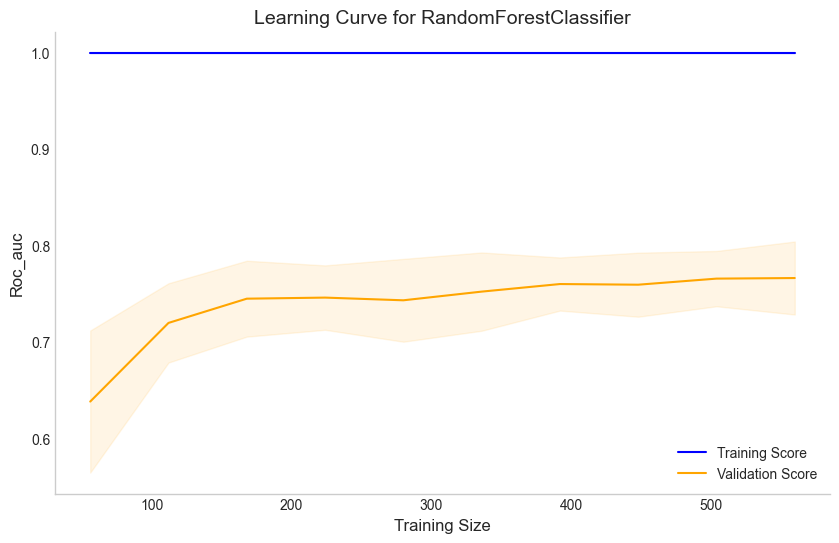


────────────────────────────────────────
📊 Training: GradientBoosting
────────────────────────────────────────
   ROC-AUC:  0.7634 ± 0.0385
   Accuracy: 0.7600 ± 0.0315

   📈 Learning Curve:
   ROC-AUC:  0.7634 ± 0.0385
   Accuracy: 0.7600 ± 0.0315

   📈 Learning Curve:


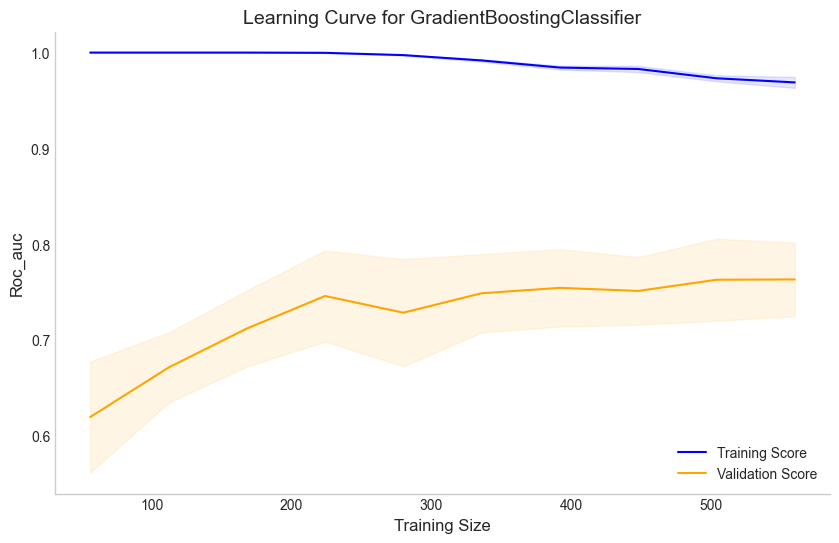


────────────────────────────────────────
📊 Training: XGBoost
────────────────────────────────────────
   ROC-AUC:  0.7388 ± 0.0449
   Accuracy: 0.7314 ± 0.0446

   📈 Learning Curve:
   ROC-AUC:  0.7388 ± 0.0449
   Accuracy: 0.7314 ± 0.0446

   📈 Learning Curve:


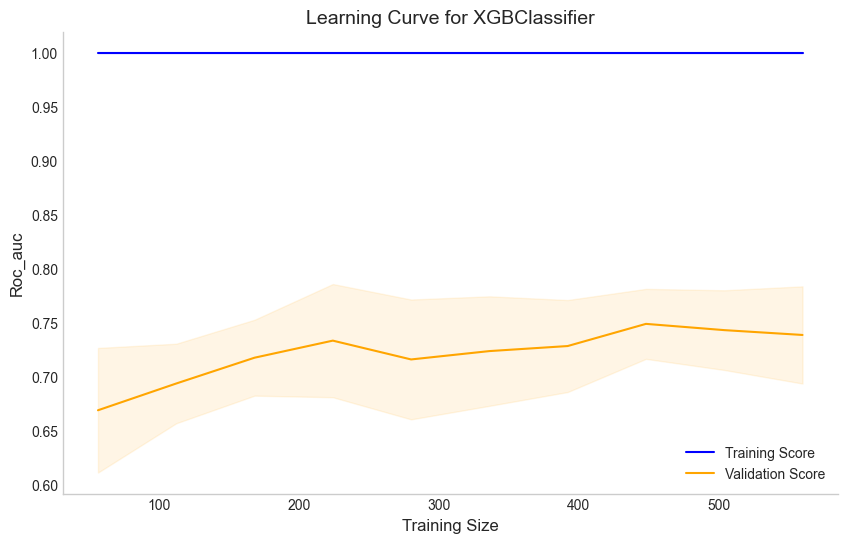


────────────────────────────────────────
📊 Training: CatBoost
────────────────────────────────────────
   ROC-AUC:  0.7849 ± 0.0266
   Accuracy: 0.7629 ± 0.0311
   ROC-AUC:  0.7849 ± 0.0266
   Accuracy: 0.7629 ± 0.0311

   📈 Learning Curve:

   📈 Learning Curve:


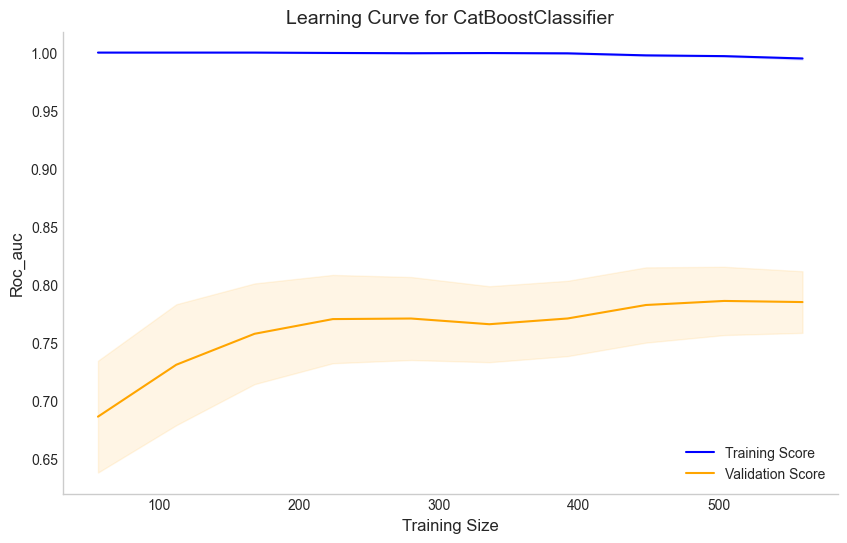


📋 RESULTS SUMMARY TABLE
                   Model          ROC-AUC         Accuracy
Rank                                                      
1     LogisticRegression  0.7883 ± 0.0285  0.7543 ± 0.0205
2                    SVC  0.7860 ± 0.0300  0.7500 ± 0.0120
3               CatBoost  0.7849 ± 0.0266  0.7629 ± 0.0311
4           RandomForest  0.7665 ± 0.0378  0.7414 ± 0.0330
5       GradientBoosting  0.7634 ± 0.0385  0.7600 ± 0.0315
6                XGBoost  0.7388 ± 0.0449  0.7314 ± 0.0446
7        DummyClassifier  0.5000 ± 0.0000  0.7000 ± 0.0000

🏆 Best Model: LogisticRegression (ROC-AUC: 0.7883)


,Model,ROC-AUC Mean,ROC-AUC Std,Accuracy Mean,Accuracy Std,ROC-AUC,Accuracy
0,LogisticRegression,0.788290,0.028467,0.754286,0.020504,0.7883 ± 0.0285,0.7543 ± 0.0205
1,SVC,0.786006,0.030041,0.750000,0.011952,0.7860 ± 0.0300,0.7500 ± 0.0120
2,CatBoost,0.784937,0.026566,0.762857,0.031102,0.7849 ± 0.0266,0.7629 ± 0.0311
3,RandomForest,0.766497,0.037806,0.741429,0.033012,0.7665 ± 0.0378,0.7414 ± 0.0330
4,GradientBoosting,0.763411,0.038467,0.760000,0.031493,0.7634 ± 0.0385,0.7600 ± 0.0315
5,XGBoost,0.738824,0.044945,0.731429,0.044630,0.7388 ± 0.0449,0.7314 ± 0.0446
6,DummyClassifier,0.500000,0.000000,0.700000,0.000000,0.5000 ± 0.0000,0.7000 ± 0.0000


In [21]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import xgboost as xgb
from catboost import CatBoostClassifier

# Define models with vanilla configuration + random_state
# Note: CatBoost has sklearn compatibility issues, so we handle it separately
sklearn_models = [
    ('DummyClassifier', DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE)),
    ('LogisticRegression', log_reg_tuned.best_estimator_),
    #('LogisticRegression', LogisticRegression(random_state=RANDOM_STATE)),
    ('SVC', svc_tuned.best_estimator_),
    #('SVC', SVC(probability=True, random_state=RANDOM_STATE)),
    ('RandomForest', RandomForestClassifier(random_state=RANDOM_STATE)),
    ('GradientBoosting', GradientBoostingClassifier(random_state=RANDOM_STATE)),
    ('XGBoost', xgb.XGBClassifier(random_state=RANDOM_STATE, verbosity=0)),
]

train_df_enc = full_pipeline.fit_transform(train_df, y_train)
# Store results
results = []

print("=" * 80)
print("MODEL COMPARISON - 5-Fold Cross Validation")
print("=" * 80)
print(f"Dataset shape: {train_df_enc.shape}\n")

# Train sklearn-compatible models
for name, model in sklearn_models:
    print(f"\n{'─' * 40}")
    print(f"📊 Training: {name}")
    print(f"{'─' * 40}")
    
    # Cross-validation for ROC-AUC
    roc_auc_scores = cross_val_score(model, train_df_enc, y_train, cv=5, scoring='roc_auc')
    roc_auc_mean = np.mean(roc_auc_scores)
    roc_auc_std = np.std(roc_auc_scores)
    
    # Cross-validation for Accuracy
    accuracy_scores = cross_val_score(model, train_df_enc, y_train, cv=5, scoring='accuracy')
    accuracy_mean = np.mean(accuracy_scores)
    accuracy_std = np.std(accuracy_scores)
    
    print(f"   ROC-AUC:  {roc_auc_mean:.4f} ± {roc_auc_std:.4f}")
    print(f"   Accuracy: {accuracy_mean:.4f} ± {accuracy_std:.4f}")
    
    # Store results
    results.append({
        'Model': name,
        'ROC-AUC Mean': roc_auc_mean,
        'ROC-AUC Std': roc_auc_std,
        'Accuracy Mean': accuracy_mean,
        'Accuracy Std': accuracy_std
    })
    
    # Fit model for learning curve
    model.fit(train_df_enc, y_train)
    
    # Plot learning curve
    print(f"\n   📈 Learning Curve:")
    plot_learning_curve(model, train_df_enc, y_train, cv=5, scoring='roc_auc')

# Handle CatBoost separately due to sklearn compatibility issues
print(f"\n{'─' * 40}")
print(f"📊 Training: CatBoost")
print(f"{'─' * 40}")

# Manual cross-validation for CatBoost
from sklearn.metrics import roc_auc_score, accuracy_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
catboost_roc_scores = []
catboost_acc_scores = []

for train_idx, val_idx in skf.split(train_df_enc, y_train):
    X_tr, X_val = train_df_enc.iloc[train_idx], train_df_enc.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    cb_model = CatBoostClassifier(random_state=RANDOM_STATE, verbose=0)
    cb_model.fit(X_tr, y_tr)
    
    # ROC-AUC
    y_pred_proba = cb_model.predict_proba(X_val)[:, 1]
    catboost_roc_scores.append(roc_auc_score(y_val, y_pred_proba))
    
    # Accuracy
    y_pred = cb_model.predict(X_val)
    catboost_acc_scores.append(accuracy_score(y_val, y_pred))

catboost_roc_mean = np.mean(catboost_roc_scores)
catboost_roc_std = np.std(catboost_roc_scores)
catboost_acc_mean = np.mean(catboost_acc_scores)
catboost_acc_std = np.std(catboost_acc_scores)

print(f"   ROC-AUC:  {catboost_roc_mean:.4f} ± {catboost_roc_std:.4f}")
print(f"   Accuracy: {catboost_acc_mean:.4f} ± {catboost_acc_std:.4f}")

results.append({
    'Model': 'CatBoost',
    'ROC-AUC Mean': catboost_roc_mean,
    'ROC-AUC Std': catboost_roc_std,
    'Accuracy Mean': catboost_acc_mean,
    'Accuracy Std': catboost_acc_std
})

# Fit final CatBoost model and plot learning curve manually
catboost_final = CatBoostClassifier(random_state=RANDOM_STATE, verbose=0)
catboost_final.fit(train_df_enc, y_train)

# Manual learning curve for CatBoost
print(f"\n   📈 Learning Curve:")
train_sizes_pct = np.linspace(0.1, 1.0, 10)
train_scores_cb = []
val_scores_cb = []

for train_size in train_sizes_pct:
    fold_train_scores = []
    fold_val_scores = []
    
    for train_idx, val_idx in skf.split(train_df_enc, y_train):
        # Subsample training data
        n_samples = int(len(train_idx) * train_size)
        train_idx_subset = train_idx[:n_samples]
        
        X_tr = train_df_enc.iloc[train_idx_subset]
        y_tr = y_train.iloc[train_idx_subset]
        X_val = train_df_enc.iloc[val_idx]
        y_val = y_train.iloc[val_idx]
        
        cb = CatBoostClassifier(random_state=RANDOM_STATE, verbose=0)
        cb.fit(X_tr, y_tr)
        
        # Training score
        fold_train_scores.append(roc_auc_score(y_tr, cb.predict_proba(X_tr)[:, 1]))
        # Validation score
        fold_val_scores.append(roc_auc_score(y_val, cb.predict_proba(X_val)[:, 1]))
    
    train_scores_cb.append(fold_train_scores)
    val_scores_cb.append(fold_val_scores)

train_scores_cb = np.array(train_scores_cb)
val_scores_cb = np.array(val_scores_cb)
train_sizes_abs = (train_sizes_pct * len(train_df_enc) * 0.8).astype(int)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(train_sizes_abs, train_scores_cb.mean(axis=1), label='Training Score', color='blue')
ax.plot(train_sizes_abs, val_scores_cb.mean(axis=1), label='Validation Score', color='orange')
ax.fill_between(train_sizes_abs, 
                train_scores_cb.mean(axis=1) - train_scores_cb.std(axis=1),
                train_scores_cb.mean(axis=1) + train_scores_cb.std(axis=1), 
                alpha=0.1, color='blue')
ax.fill_between(train_sizes_abs, 
                val_scores_cb.mean(axis=1) - val_scores_cb.std(axis=1),
                val_scores_cb.mean(axis=1) + val_scores_cb.std(axis=1), 
                alpha=0.1, color='orange')
ax.set_xlabel('Training Size')
ax.set_ylabel('Roc_auc')
ax.set_title('Learning Curve for CatBoostClassifier')
ax.legend(loc='best')
ax.grid()
plt.show()

# Create results DataFrame
print("\n" + "=" * 80)
print("📋 RESULTS SUMMARY TABLE")
print("=" * 80)

results_df = pd.DataFrame(results)
results_df['ROC-AUC'] = results_df.apply(lambda x: f"{x['ROC-AUC Mean']:.4f} ± {x['ROC-AUC Std']:.4f}", axis=1)
results_df['Accuracy'] = results_df.apply(lambda x: f"{x['Accuracy Mean']:.4f} ± {x['Accuracy Std']:.4f}", axis=1)

# Sort by ROC-AUC Mean descending
results_df = results_df.sort_values('ROC-AUC Mean', ascending=False).reset_index(drop=True)

# Display clean table
display_df = results_df[['Model', 'ROC-AUC', 'Accuracy']].copy()
display_df.index = range(1, len(display_df) + 1)
display_df.index.name = 'Rank'

print(display_df.to_string())

# Highlight best model
best_model = results_df.iloc[0]['Model']
best_roc_auc = results_df.iloc[0]['ROC-AUC Mean']
print(f"\n🏆 Best Model: {best_model} (ROC-AUC: {best_roc_auc:.4f})")

# Store for later use
results_df


================================================================================
📋 RESULTS SUMMARY TABLE
================================================================================
                   Model          ROC-AUC         Accuracy
Rank                                                      
1               CatBoost  0.7849 ± 0.0266  0.7629 ± 0.0311
2     LogisticRegression  0.7830 ± 0.0337  0.7571 ± 0.0256
3                    SVC  0.7790 ± 0.0428  0.7629 ± 0.0265
4           RandomForest  0.7665 ± 0.0378  0.7414 ± 0.0330
5       GradientBoosting  0.7634 ± 0.0385  0.7600 ± 0.0315
6                XGBoost  0.7388 ± 0.0449  0.7314 ± 0.0446
7        DummyClassifier  0.5000 ± 0.0000  0.7000 ± 0.0000

🏆 Best Model: CatBoost (ROC-AUC: 0.7849)

In [8]:
pipe = full_pipeline.fit(train_df, y_train)
train_df_enc = pipe.transform(train_df)
val_df_enc = pipe.transform(X_val)

In [11]:
val_df_enc.head()

,one_hot__credit_history_critical/other credits exist,one_hot__credit_history_existing credits paid duly,one_hot__credit_history_all credits paid,one_hot__credit_history_delay in paying off in past,one_hot__purpose_radio/television,one_hot__purpose_furniture/equipment,one_hot__purpose_business,one_hot__purpose_car (new),one_hot__purpose_personal_development,one_hot__purpose_car (used),...,one_hot__duration_bins_medium,one_hot__duration_bins_long,one_hot__duration_bins_very_long,woe__checking_account_status,woe__savings_account_bonds,woe__present_employment_since,woe__age_group,woe__other_installment_plans,woe__job,scaler__monthly_burden
721,0,0,1,0,0,0,0,0,1,0,...,0,0,0,-0.344860,0.897223,-0.443545,-0.386417,-0.487721,-0.022705,-0.795377
614,0,0,0,1,0,1,0,0,0,0,...,1,0,0,1.141135,-0.300091,0.391639,-0.386417,0.114106,-0.022705,-0.544646
366,1,0,0,0,0,0,0,0,0,1,...,1,0,0,1.141135,-0.300091,0.391639,0.048175,0.114106,-0.022705,0.461235
724,0,1,0,0,0,0,0,1,0,0,...,0,1,0,1.141135,-0.300091,-0.073710,-0.386417,0.114106,-0.022705,-0.591279
477,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0.225948,-0.300091,0.391639,-0.386417,-0.487721,-0.022705,0.468131


In [11]:
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import xgboost as xgb
from catboost import CatBoostClassifier

In [30]:
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import xgboost as xgb
from catboost import CatBoostClassifier


print("=" * 80)
print("VALIDATION SET EVALUATION")
print("=" * 80)
print(f"Validation set shape: {val_df_enc.shape}\n")

# Store validation results
val_results = []

# Define models (same as before) - need to retrain on full training set
sklearn_models_val = [
    ('DummyClassifier', DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE)),
    ('LogisticRegression', log_reg_tuned.best_estimator_),
    #('LogisticRegression', LogisticRegression(random_state=RANDOM_STATE)),
    ('SVC', svc_tuned.best_estimator_),
    ('RandomForest', RandomForestClassifier(random_state=RANDOM_STATE)),
    ('GradientBoosting', GradientBoostingClassifier(random_state=RANDOM_STATE)),
    ('XGBoost', xgb.XGBClassifier(random_state=RANDOM_STATE, verbosity=0)),
]

# Train on full training set and evaluate on validation set
for name, model in sklearn_models_val:
    print(f"{'─' * 40}")
    print(f"📊 Evaluating: {name}")
    print(f"{'─' * 40}")
    
    # Fit on training data
    model.fit(train_df_enc, y_train)
    
    # Predict on validation set
    y_pred = model.predict(val_df_enc)
    y_pred_proba = model.predict_proba(val_df_enc)[:, 1]
    
    # Calculate metrics
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    accuracy = accuracy_score(y_val, y_pred)
    
    print(f"   ROC-AUC:  {roc_auc:.4f}")
    print(f"   Accuracy: {accuracy:.4f}\n")
    
    # Store results
    val_results.append({
        'Model': name,
        'ROC-AUC': roc_auc,
        'Accuracy': accuracy
    })

# Handle CatBoost separately
print(f"{'─' * 40}")
print(f"📊 Evaluating: CatBoost")
print(f"{'─' * 40}")

catboost_val = CatBoostClassifier(random_state=RANDOM_STATE, verbose=0)
catboost_val.fit(train_df_enc, y_train)

y_pred_cb = catboost_val.predict(val_df_enc)
y_pred_proba_cb = catboost_val.predict_proba(val_df_enc)[:, 1]

roc_auc_cb = roc_auc_score(y_val, y_pred_proba_cb)
accuracy_cb = accuracy_score(y_val, y_pred_cb)

print(f"   ROC-AUC:  {roc_auc_cb:.4f}")
print(f"   Accuracy: {accuracy_cb:.4f}\n")

val_results.append({
    'Model': 'CatBoost',
    'ROC-AUC': roc_auc_cb,
    'Accuracy': accuracy_cb
})

# Create validation results DataFrame
print("\n" + "=" * 80)
print("📋 VALIDATION SET RESULTS TABLE")
print("=" * 80)

val_results_df = pd.DataFrame(val_results)

# Sort by ROC-AUC descending
val_results_df = val_results_df.sort_values('ROC-AUC', ascending=False).reset_index(drop=True)

# Format for display
val_results_df['ROC-AUC'] = val_results_df['ROC-AUC'].apply(lambda x: f"{x:.4f}")
val_results_df['Accuracy'] = val_results_df['Accuracy'].apply(lambda x: f"{x:.4f}")

# Add rank
val_results_df.index = range(1, len(val_results_df) + 1)
val_results_df.index.name = 'Rank'

print(val_results_df.to_string())

# Highlight best model
best_val_model = val_results_df.iloc[0]['Model']
best_val_roc_auc = val_results_df.iloc[0]['ROC-AUC']
print(f"\n🏆 Best Model on Validation Set: {best_val_model} (ROC-AUC: {best_val_roc_auc})")

# Store for comparison
val_results_df

VALIDATION SET EVALUATION
Validation set shape: (150, 34)

────────────────────────────────────────
📊 Evaluating: DummyClassifier
────────────────────────────────────────
   ROC-AUC:  0.5000
   Accuracy: 0.7000

────────────────────────────────────────
📊 Evaluating: LogisticRegression
────────────────────────────────────────
   ROC-AUC:  0.7867
   Accuracy: 0.7667

────────────────────────────────────────
📊 Evaluating: SVC
────────────────────────────────────────
   ROC-AUC:  0.7835
   Accuracy: 0.7600

────────────────────────────────────────
📊 Evaluating: RandomForest
────────────────────────────────────────
   ROC-AUC:  0.7761
   Accuracy: 0.7267

────────────────────────────────────────
📊 Evaluating: GradientBoosting
────────────────────────────────────────
   ROC-AUC:  0.7909
   Accuracy: 0.7933

────────────────────────────────────────
📊 Evaluating: XGBoost
────────────────────────────────────────


/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


   ROC-AUC:  0.7371
   Accuracy: 0.7267

────────────────────────────────────────
📊 Evaluating: CatBoost
────────────────────────────────────────
   ROC-AUC:  0.7841
   Accuracy: 0.7667


📋 VALIDATION SET RESULTS TABLE
                   Model ROC-AUC Accuracy
Rank                                     
1       GradientBoosting  0.7909   0.7933
2     LogisticRegression  0.7867   0.7667
3               CatBoost  0.7841   0.7667
4                    SVC  0.7835   0.7600
5           RandomForest  0.7761   0.7267
6                XGBoost  0.7371   0.7267
7        DummyClassifier  0.5000   0.7000

🏆 Best Model on Validation Set: GradientBoosting (ROC-AUC: 0.7909)
   ROC-AUC:  0.7841
   Accuracy: 0.7667


📋 VALIDATION SET RESULTS TABLE
                   Model ROC-AUC Accuracy
Rank                                     
1       GradientBoosting  0.7909   0.7933
2     LogisticRegression  0.7867   0.7667
3               CatBoost  0.7841   0.7667
4                    SVC  0.7835   0.7600
5         

,Model,ROC-AUC,Accuracy
Rank,,,
1,GradientBoosting,0.7909,0.7933
2,LogisticRegression,0.7867,0.7667
3,CatBoost,0.7841,0.7667
4,SVC,0.7835,0.7600
5,RandomForest,0.7761,0.7267
6,XGBoost,0.7371,0.7267
7,DummyClassifier,0.5000,0.7000


In [31]:
for model in [svc_tuned.best_estimator_, log_reg_tuned.best_estimator_, model]:
    print(f"{'─' * 40}")
    
    
    # Predict on validation set
    y_pred = model.predict(val_df_enc)
    y_pred_proba = model.predict_proba(val_df_enc)[:, 1]
    
    # Calculate metrics
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    accuracy = accuracy_score(y_val, y_pred)
    
    print(f"   ROC-AUC:  {roc_auc:.4f}")
    print(f"   Accuracy: {accuracy:.4f}\n")

────────────────────────────────────────
   ROC-AUC:  0.7835
   Accuracy: 0.7600

────────────────────────────────────────
   ROC-AUC:  0.7867
   Accuracy: 0.7667

────────────────────────────────────────
   ROC-AUC:  0.7371
   Accuracy: 0.7267



In [38]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(
    estimators=[('LogisticRegression', log_reg_tuned.best_estimator_),
    #('LogisticRegression', LogisticRegression(random_state=RANDOM_STATE)),
    ('SVC', svc_tuned.best_estimator_),
    
    ('GradientBoosting', GradientBoostingClassifier(random_state=RANDOM_STATE))],
    voting='soft',
    weights=[2, 1, 1]  # Favor CatBoost
)

voting_cv = cross_val_score(voting, train_df_enc, y_train, cv=5, scoring='roc_auc').mean()
print(f"Voting CV AUC: {voting_cv:.4f}")

/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty'

Voting CV AUC: 0.7910


/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


In [39]:
# Predict on validation set
voting.fit(train_df_enc, y_train)
y_pred = voting.predict(val_df_enc)
y_pred_proba = voting.predict_proba(val_df_enc)[:, 1]
    
# Calculate metrics
roc_auc = roc_auc_score(y_val, y_pred_proba)
accuracy = accuracy_score(y_val, y_pred)
    
print(f"   ROC-AUC:  {roc_auc:.4f}")
print(f"   Accuracy: {accuracy:.4f}\n")

   ROC-AUC:  0.8015
   Accuracy: 0.7667



/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


In [40]:
test_df_enc = pipe.transform(X_test)
y_pred = voting.predict(test_df_enc)
y_pred_proba = voting.predict_proba(test_df_enc)[:, 1]
    
# Calculate metrics
roc_auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
    
print(f"   ROC-AUC:  {roc_auc:.4f}")
print(f"   Accuracy: {accuracy:.4f}\n")

   ROC-AUC:  0.7983
   Accuracy: 0.7400



In [25]:
y_val.shape

(140,)

In [17]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical


svc_space = {
    'C': Real(0.1, 20, prior='uniform'),
    'gamma': Real(1e-4, 1, prior='uniform'),
    'kernel': Categorical(['rbf', 'linear']),
    'tol': Real(1e-4, 1e-1, prior='log-uniform'),
    #'class_weight': Categorical('balanced', None)
}


log_reg_space = {
    'penalty': Categorical(['l2']),
    'C': Real(0.01, 20, prior='uniform'),
    'solver': Categorical(['liblinear']),
    'max_iter': Integer(1000, 8000),
    #'class_weight': Categorical('balanced', None)
}

cat_boost_space = {
    'depth': Integer(4,10),
    'iterations': Integer(100, 400),
    'learning_rate': Real(0.01, 0.2, prior='uniform'),
}


In [18]:
svc_tuned = BayesSearchCV(
    estimator=SVC(probability=True, random_state=RANDOM_STATE),
    search_spaces=svc_space,
    n_iter=20,
    scoring='roc_auc',
    cv=5,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=0
)
log_reg_tuned = BayesSearchCV(
    estimator=LogisticRegression(random_state=RANDOM_STATE),
    search_spaces=log_reg_space,
    n_iter=20,
    scoring='roc_auc',
    cv=5,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=0
)
cat_boost_tuned = BayesSearchCV(
    estimator=CatBoostClassifier(random_state=RANDOM_STATE, verbose=0),
    search_spaces=cat_boost_space,
    n_iter=10,
    scoring='roc_auc',
    cv=5,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=0
)


In [ ]:
import warnings
warnings.filterwarnings("ignore", message="pkg_resources is deprecated")
warnings.filterwarnings("ignore", category=UserWarning, module="pkg_resources")
warnings.filterwarnings("ignore", category=FutureWarning)

for model in [svc_tuned, log_reg_tuned]:
        scores = cross_val_score(model, train_df_enc, y_train, cv=5, scoring='roc_auc')
        print(f"{model.__class__.__name__} AUC: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

BayesSearchCV AUC: 0.7734 ± 0.0469


/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty'

BayesSearchCV AUC: 0.7863 ± 0.0316


/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


In [19]:
svc_tuned.fit(train_df_enc, y_train)

/Users/fotisn/.local/share/uv/python/cpython-3.13.9-macos-aarch64-none/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Users/fotisn/.local/share/uv/python/cpython-3.13.9-macos-aarch64-none/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Users/fotisn/.local/share/uv/python/cpython-3.13.9-macos-aarch64-none/lib/python3.13/multiprocessing/queues.py:120: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/

,estimator,SVC(probabili...andom_state=8)
,search_spaces,"{'C': Real(low=0.1,...m='normalize'), 'gamma': Real(low=0.00...m='normalize'), 'kernel': Categorical(c...), prior=None), 'tol': Real(low=0.00...m='normalize')}"
,optimizer_kwargs,None
,n_iter,20
,scoring,'roc_auc'
,fit_params,None
,n_jobs,-1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,5


In [20]:
log_reg_tuned.fit(train_df_enc, y_train)

/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty'

,estimator,LogisticRegre...andom_state=8)
,search_spaces,"{'C': Real(low=0.01...m='normalize'), 'max_iter': Integer(low=1...m='normalize'), 'penalty': Categorical(c...), prior=None), 'solver': Categorical(c...), prior=None)}"
,optimizer_kwargs,None
,n_iter,20
,scoring,'roc_auc'
,fit_params,None
,n_jobs,-1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,5


In [ ]:
import pickle

# Save the best estimators
with open('svc_tuned_model.pkl', 'wb') as f:
    pickle.dump(svc_tuned.best_estimator_, f)

with open('log_reg_tuned_model.pkl', 'wb') as f:
    pickle.dump(log_reg_tuned.best_estimator_, f)

with open('xgb_tuned_model.pkl', 'wb') as f:
    pickle.dump(xgb_tuned.best_estimator_, f)

print("Models saved successfully!")

# Extract best estimators for evaluation
svc_t = svc_tuned.best_estimator_
log_reg_t = log_reg_tuned.best_estimator_
xgboost_t = xgb_tuned.best_estimator_

for dataset in sets:
    print(f"Dataset shape: {dataset.shape}")
    for model in [svc_t, log_reg_t, xgboost_t]:
        scores = cross_val_score(model, dataset, y_train, cv=5, scoring='roc_auc')
        print(f"{model.__class__.__name__} AUC: {np.mean(scores):.4f} ± {np.std(scores):.4f}")
    print("-" * 40)

Dataset shape: (700, 36)
SVC AUC: 0.7807 ± 0.0322
LogisticRegression AUC: 0.7863 ± 0.0106


/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty'

XGBClassifier AUC: 0.7990 ± 0.0294
----------------------------------------


In [97]:
import pickle
# Save the best estimators
with open('svc_tuned_model.pkl', 'wb') as f:
    pickle.dump(svc_tuned.best_estimator_, f)

with open('log_reg_tuned_model.pkl', 'wb') as f:
    pickle.dump(log_reg_tuned.best_estimator_, f)

with open('xgb_tuned_model.pkl', 'wb') as f:
    pickle.dump(xgb_tuned.best_estimator_, f)

print("Models saved successfully!")


Models saved successfully!


In [4]:
import pickle
# Load the models
with open('svc_tuned_model.pkl', 'rb') as f:
    svc_t = pickle.load(f)
with open('log_reg_tuned_model.pkl', 'rb') as f:
    log_reg_t = pickle.load(f)
with open('xgb_tuned_model.pkl', 'rb') as f:
    xgboost_t = pickle.load(f)

In [ ]:
def check_feature_target_correlation(X, y, method='auto'):
    """
    Check correlation between features and target variable.
    Handles both numeric and categorical features appropriately.
    
    Parameters:
    -----------
    X : pd.DataFrame - Feature matrix
    y : pd.Series - Target variable
    method : str - Correlation method:
        - 'auto': Automatically choose based on feature type
        - 'point_biserial': For numeric features with binary target
        - 'cramers_v': For categorical features with categorical target
    
    Returns:
    --------
    pd.DataFrame - Correlations sorted by absolute value
    """
    from scipy.stats import pointbiserialr, chi2_contingency
    
    def cramers_v(x, y):
        """Calculate Cramér's V statistic for categorical-categorical association."""
        contingency_table = pd.crosstab(x, y)
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        n = contingency_table.sum().sum()
        min_dim = min(contingency_table.shape) - 1
        if min_dim == 0:
            return 0, p_value
        v = np.sqrt(chi2 / (n * min_dim))
        return v, p_value
    
    correlations = []
    
    for col in X.columns:
        try:
            # Check if column is numeric
            if pd.api.types.is_numeric_dtype(X[col]):
                # Use point-biserial for numeric features
                # Drop NaN values for calculation
                mask = ~(X[col].isna() | y.isna())
                corr, p_value = pointbiserialr(y[mask], X[col][mask])
                method_used = 'point_biserial'
            else:
                # Use Cramér's V for categorical features
                corr, p_value = cramers_v(X[col].astype(str), y)
                method_used = 'cramers_v'
            
            correlations.append({
                'feature': col,
                'correlation': corr,
                'abs_correlation': abs(corr),
                'p_value': p_value,
                'significant': p_value < 0.05,
                'method': method_used,
                'dtype': str(X[col].dtype)
            })
        except Exception as e:
            print(f"⚠️ Could not calculate correlation for '{col}': {e}")
            correlations.append({
                'feature': col,
                'correlation': np.nan,
                'abs_correlation': np.nan,
                'p_value': np.nan,
                'significant': False,
                'method': 'error',
                'dtype': str(X[col].dtype)
            })
    
    # Create DataFrame and sort by absolute correlation
    corr_df = pd.DataFrame(correlations)
    corr_df = corr_df.sort_values('abs_correlation', ascending=False).reset_index(drop=True)
    
    # Print results
    print("=" * 85)
    print(f"FEATURE-TARGET CORRELATION ANALYSIS")
    print("=" * 85)
    print(f"\n{'Feature':<30} {'Correlation':>10} {'P-value':>10} {'Sig?':>6} {'Method':>15}")
    print("-" * 85)
    
    for _, row in corr_df.iterrows():
        sig_marker = "✓" if row['significant'] else "✗"
        corr_val = f"{row['correlation']:.4f}" if pd.notna(row['correlation']) else "N/A"
        p_val = f"{row['p_value']:.4f}" if pd.notna(row['p_value']) else "N/A"
        print(f"{row['feature']:<30} {corr_val:>10} {p_val:>10} {sig_marker:>6} {row['method']:>15}")
    
    # Summary
    print("\n" + "=" * 85)
    print("SUMMARY")
    print("=" * 85)
    
    valid_corr = corr_df[corr_df['abs_correlation'].notna()]
    strong = valid_corr[valid_corr['abs_correlation'] >= 0.3]
    moderate = valid_corr[(valid_corr['abs_correlation'] >= 0.1) & (valid_corr['abs_correlation'] < 0.3)]
    weak = valid_corr[valid_corr['abs_correlation'] < 0.1]
    
    print(f"\n📊 Methods used:")
    print(f"   • Point-biserial (numeric features): {len(corr_df[corr_df['method'] == 'point_biserial'])}")
    print(f"   • Cramér's V (categorical features): {len(corr_df[corr_df['method'] == 'cramers_v'])}")
    
    print(f"\n🔴 Strong correlation (|r| >= 0.3): {len(strong)} features")
    if len(strong) > 0:
        print(f"   → {', '.join(strong['feature'].tolist())}")
    
    print(f"🟡 Moderate correlation (0.1 <= |r| < 0.3): {len(moderate)} features")
    if len(moderate) > 0:
        print(f"   → {', '.join(moderate['feature'].tolist())}")
    
    print(f"🟢 Weak correlation (|r| < 0.1): {len(weak)} features")
    
    not_significant = corr_df[~corr_df['significant'] & corr_df['p_value'].notna()]
    if len(not_significant) > 0:
        print(f"\n⚠️ Non-significant correlations (p >= 0.05): {len(not_significant)}")
        print(f"   → {', '.join(not_significant['feature'].tolist())}")
    
    return corr_df


def check_multicollinearity(X, threshold=0.7, vif_threshold=5.0):
    """
    Check multicollinearity between features using correlation matrix and VIF.
    
    Parameters:
    -----------
    X : pd.DataFrame - Feature matrix (numeric columns only)
    threshold : float - Correlation threshold to flag high correlation (default: 0.7)
    vif_threshold : float - VIF threshold to flag multicollinearity (default: 5.0)
    
    Returns:
    --------
    dict - Dictionary with correlation pairs and VIF values
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    
    # Select only numeric columns
    numeric_X = X.select_dtypes(include=[np.number])
    
    print("=" * 70)
    print("MULTICOLLINEARITY ANALYSIS")
    print("=" * 70)
    
    if len(numeric_X.columns) == 0:
        print("\n⚠️ No numeric columns found in the dataset!")
        return {'high_correlation_pairs': None, 'vif_scores': None, 'features_to_drop': []}
    
    print(f"\n📌 Analyzing {len(numeric_X.columns)} numeric features")
    
    # 1. Correlation Matrix Analysis
    print(f"\n📊 CORRELATION ANALYSIS (threshold: |r| >= {threshold})")
    print("-" * 70)
    
    corr_matrix = numeric_X.corr()
    
    # Find highly correlated pairs
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) >= threshold:
                high_corr_pairs.append({
                    'feature_1': corr_matrix.columns[i],
                    'feature_2': corr_matrix.columns[j],
                    'correlation': corr_val
                })
    
    if high_corr_pairs:
        high_corr_df = pd.DataFrame(high_corr_pairs)
        high_corr_df = high_corr_df.sort_values('correlation', key=abs, ascending=False)
        
        print(f"\n⚠️ Found {len(high_corr_pairs)} highly correlated feature pairs:\n")
        print(f"{'Feature 1':<25} {'Feature 2':<25} {'Correlation':>12}")
        print("-" * 65)
        for _, row in high_corr_df.iterrows():
            print(f"{row['feature_1']:<25} {row['feature_2']:<25} {row['correlation']:>12.4f}")
    else:
        print(f"✅ No feature pairs with correlation >= {threshold}")
        high_corr_df = pd.DataFrame()
    
    # 2. Variance Inflation Factor (VIF) Analysis
    print(f"\n📊 VIF ANALYSIS (threshold: VIF >= {vif_threshold})")
    print("-" * 70)
    
    # Handle potential issues with VIF calculation
    try:
        # Remove constant columns and handle NaN
        X_clean = numeric_X.dropna()
        X_clean = X_clean.loc[:, X_clean.std() > 0]  # Remove zero-variance columns
        
        if len(X_clean.columns) > 1:
            vif_data = []
            for i, col in enumerate(X_clean.columns):
                try:
                    vif = variance_inflation_factor(X_clean.values, i)
                    vif_data.append({'feature': col, 'VIF': vif})
                except Exception as e:
                    vif_data.append({'feature': col, 'VIF': np.nan})
            
            vif_df = pd.DataFrame(vif_data)
            vif_df = vif_df.sort_values('VIF', ascending=False).reset_index(drop=True)
            
            print(f"\n{'Feature':<35} {'VIF':>12} {'Status':>15}")
            print("-" * 65)
            
            for _, row in vif_df.iterrows():
                if pd.isna(row['VIF']):
                    status = "⚠️ Error"
                elif row['VIF'] >= 10:
                    status = "🔴 High"
                elif row['VIF'] >= vif_threshold:
                    status = "🟡 Moderate"
                else:
                    status = "🟢 OK"
                print(f"{row['feature']:<35} {row['VIF']:>12.2f} {status:>15}")
            
            high_vif = vif_df[vif_df['VIF'] >= vif_threshold]
        else:
            print("⚠️ Not enough features to calculate VIF")
            vif_df = pd.DataFrame()
            high_vif = pd.DataFrame()
    except Exception as e:
        print(f"⚠️ Error calculating VIF: {e}")
        vif_df = pd.DataFrame()
        high_vif = pd.DataFrame()
    
    # 3. Recommendations
    print("\n" + "=" * 70)
    print("RECOMMENDATIONS")
    print("=" * 70)
    
    features_to_drop = set()
    
    # Based on correlation
    if len(high_corr_pairs) > 0:
        print("\n📌 Based on HIGH CORRELATION:")
        for pair in high_corr_pairs:
            f1, f2 = pair['feature_1'], pair['feature_2']
            print(f"   • Consider dropping one of: '{f1}' or '{f2}' (r = {pair['correlation']:.4f})")
            # Suggest dropping the one with lower variance (less information)
            if numeric_X[f1].std() < numeric_X[f2].std():
                features_to_drop.add(f1)
                print(f"     → Suggestion: Drop '{f1}' (lower variance)")
            else:
                features_to_drop.add(f2)
                print(f"     → Suggestion: Drop '{f2}' (lower variance)")
    
    # Based on VIF
    if len(high_vif) > 0:
        print("\n📌 Based on HIGH VIF:")
        for _, row in high_vif.iterrows():
            print(f"   • '{row['feature']}' has VIF = {row['VIF']:.2f}")
            features_to_drop.add(row['feature'])
    
    if features_to_drop:
        print(f"\n🎯 SUGGESTED FEATURES TO DROP: {list(features_to_drop)}")
        print(f"\n   Code to drop: X = X.drop(columns={list(features_to_drop)})")
    else:
        print("\n✅ No multicollinearity issues detected!")
    
    return {
        'high_correlation_pairs': high_corr_df if len(high_corr_pairs) > 0 else None,
        'vif_scores': vif_df if len(vif_df) > 0 else None,
        'features_to_drop': list(features_to_drop)
    }

<hr>

In [ ]:
# After final model selection, check stability:

final_model = CatBoostClassifier(**best_params)

# Test across multiple seeds to report uncertainty
seed_results = []
for seed in [42, 123, 456, 789, 999]:
    model = final_model.set_params(random_state=seed)
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    seed_results.append(cv_score.mean())

print(f"Mean AUC: {np.mean(seed_results):.4f}")
print(f"Std AUC: {np.std(seed_results):.4f}")
print(f"Range: [{np.min(seed_results):.4f}, {np.max(seed_results):.4f}]")

# Expected for 700 samples:
# Std ~0.01-0.02 (1-2% variation)
# This is just reporting stability, not model selection

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from category_encoders import OneHotEncoder, WOEEncoder
import pandas as pd
import numpy as np


stom transformer for feature engineering
class FeatureEngineer(BaseEstimator, TransformerMixin):
    """Custom transformer for creating new features and transforming existing ones."""
    
    def __init__(self):
        self.cols_to_drop = [
            "other_debtors_guarantors",
            "telephone",
            "foreign_worker",
            "present_residence_since",
            "existing_credits_count",
            "people_liable_for_maintenance",
            "installment_rate_pct_of_disp_income",
            "personal_status_sex"
        ]
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        
        # Drop unnecessary columns (only if they exist)
        cols_to_drop_existing = [c for c in self.cols_to_drop if c in X.columns]
        X = X.drop(columns=cols_to_drop_existing)
        
        # Create new features
        X['duration_squared'] = X['duration_months'] ** 2
        X['monthly_burden'] = X['credit_amount'] / X['duration_months']
        
        # Merge purpose categories
        X['purpose'] = X['purpose'].replace(
            ['education', 'retraining'], 'personal_development'
        )
        X['purpose'] = X['purpose'].replace(
            ['domestic appliances', 'repairs', 'others'], 'home_improvement'
        )
        
        # Bin credit amount
        X['credit_amount_bins'] = pd.cut(
            X['credit_amount'],
            bins=[0, 2000, 4000, 7000, 10000, 50000],
            labels=['a', 'b', 'c', 'd', 'e']
        )
        
        # Merge savings categories
        X['savings_account_bonds'] = X['savings_account_bonds'].replace(
            ['< 100 DM', '100 <= ... < 500 DM'], '< 500 DM'
        )
        X['savings_account_bonds'] = X['savings_account_bonds'].replace(
            ['500 <= ... < 1000 DM', '>= 1000 DM'], '>= 500 DM'
        )
        
        # Create age groups
        X['age_group'] = pd.cut(
            X['age_years'],
            bins=[0, 25, 35, 50, 65, 100],
            labels=['Young', 'Early_Career', 'Prime', 'Mature', 'Senior']
        )
        
        # Drop original columns that were transformed
        X = X.drop(columns=['duration_months', 'credit_amount', 'age_years'])
        
        return X
# Cu

# Define column groups for encoding
one_hot_cols = [
    'credit_history',
    'purpose',
    'credit_amount_bins',
    'property',
    'housing',
]

woe_cols = [
    'checking_account_status',
    'savings_account_bonds',
    'present_employment_since',
    'age_group',
    'other_installment_plans',
    'job'
]

numeric_cols = [
    'duration_squared',
    'monthly_burden',
]


# Create the encoding pipeline
encoding_pipeline = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(cols=one_hot_cols, use_cat_names=True), one_hot_cols),
        ('woe', WOEEncoder(cols=woe_cols), woe_cols),
        ('scaler', StandardScaler(), numeric_cols)
    ],
    remainder='drop'  # or 'passthrough' if you want to keep other columns
)


# Full pipeline combining feature engineering + encoding
full_pipeline = Pipeline([
    ('feature_engineer', FeatureEngineer()),
    ('encoder', encoding_pipeline)
])





<hr>

## Model training

### Training functions

In [51]:
from sklearn.model_selection import cross_val_score

def train_model(model, X_train, y_train, random_state=6, tracking=True, log_learning_curve=True, cv=5, tag=None, **config):
    """Train model with optional MLflow tracking and learning curve logging.
    
    Parameters:
    -----------
    model : estimator - Model to train
    X_train : array-like - Training features
    y_train : array-like - Training target
    random_state : int - Random state for reproducibility
    tracking : bool - Whether to log to MLflow
    log_learning_curve : bool - Whether to generate and log learning curve plot
    cv : int - Number of cross-validation folds for learning curve
    **config : dict - Model hyperparameters
    
    Returns:
    --------
    model : trained estimator
    """
    model.set_params(**config)

    if tracking:
        with mlflow.start_run(run_name=model.__class__.__name__):
            
            mlflow.set_tag('dataset', tag)
            model.fit(X_train, y_train)

            mlflow.log_params(config)
            mlflow.log_param('dataset_shape', X_train.shape)

            mlflow.log_param('model_type', model.__class__.__name__)
            # Train the model
            model.fit(X_train, y_train)
            print(f'Training dataset: {tag}')  
            # Make predictions on training data
            y_pred = model.predict(X_train)
            
            # Calculate metrics
            cross_val_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
            roc_auc = np.mean(cross_val_scores)
            cross_val_scores_f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
            f1 = np.mean(cross_val_scores_f1)
            
            # Log metrics to MLflow
            #mlflow.log_metrics({"roc_auc": roc_auc, "f1": f1})
            
            print(f"Training scores: ROC AUC={roc_auc:.4f},  F1={f1:.4f}")
            
            # Generate and log learning curve
            if log_learning_curve:
                print(f"Generating learning curve for {model.__class__.__name__}...")
                fig = plot_learning_curve(model, X_train, y_train, cv=cv, scoring='roc_auc', return_fig=True)
                
                # Save figure to temporary file and log to MLflow
                with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as tmp:
                    fig.savefig(tmp.name, dpi=100, bbox_inches='tight')
                    mlflow.log_artifact(tmp.name, artifact_path="plots")
                    os.unlink(tmp.name)  # Clean up temp file
                plt.close(fig)
                print(f"Learning curve logged to MLflow")
            
            return model
    else:
        model.fit(X_train, y_train)
        # Make predictions on training data
        y_pred = model.predict(X_train)
        print(f'Training dataset: {tag}')    
        # Calculate metrics
        cross_val_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
        roc_auc = np.mean(cross_val_scores)
        cross_val_scores_f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
        f1 = np.mean(cross_val_scores_f1)
        print(f"Training scores: ROC AUC={roc_auc:.4f}, F1={f1:.4f}")
        plot_learning_curve(model, X_train, y_train, cv=cv, scoring='roc_auc')
        return model


### Baseline models

set experiment tracking 

In [ ]:
mlflow.set_tracking_uri("file://" + str(home / "mlruns"))
mlflow.set_experiment('credit_risk-baseline_1')

Exception: Invalid parent directory '/Users/fotisn/code/repos/credit-risk-svm/mlruns/.trash'

Training dataset: svc set 2
Training scores: ROC AUC=0.7868, F1=0.8527


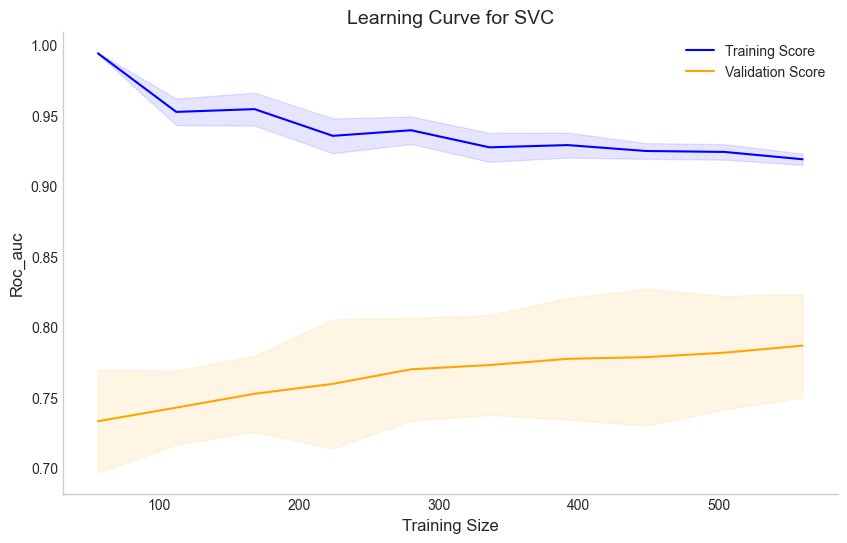

Training dataset: log reg set 2
Training scores: ROC AUC=0.7807, F1=0.8330


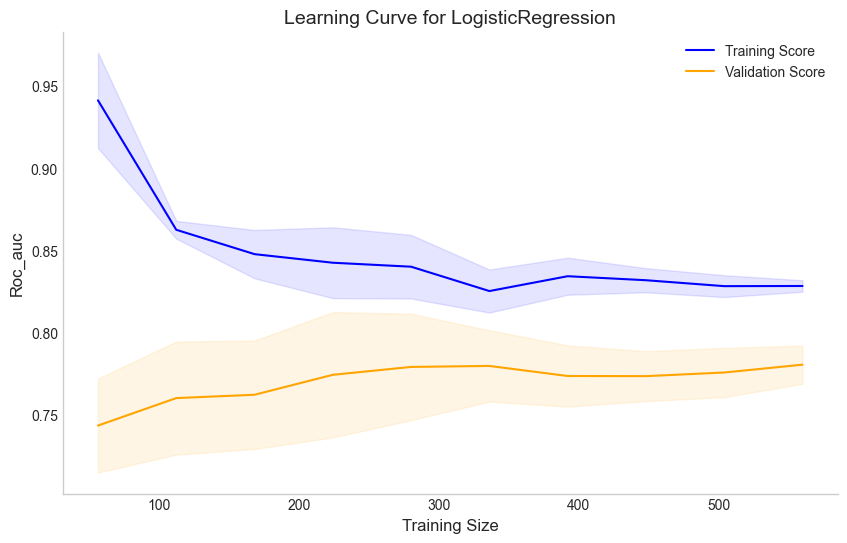

Training dataset: rand forest set 2
Training scores: ROC AUC=0.7810, F1=0.8660
Training scores: ROC AUC=0.7810, F1=0.8660


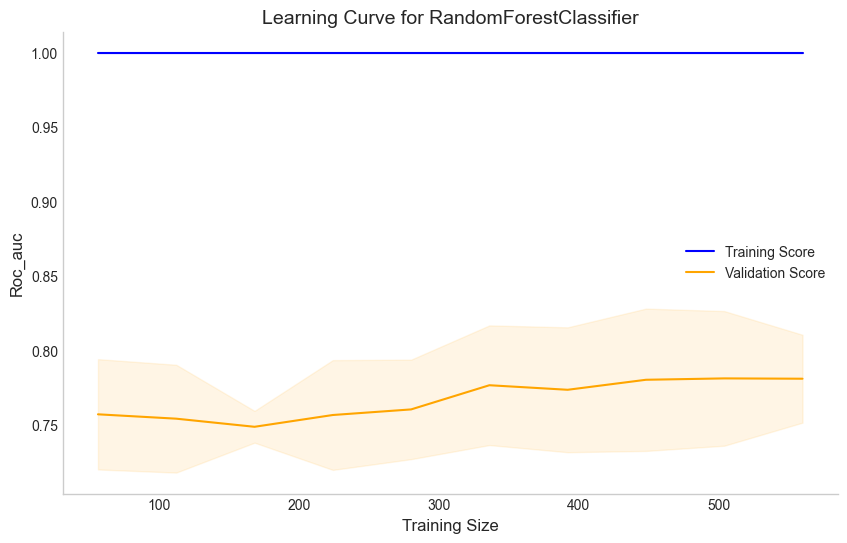

In [70]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#svc_1 = train_model(SVC(random_state=RANDOM_STATE), train_df_enc_1, y_train, tag='svc set 1', tracking=False, random_state=RANDOM_STATE)
svc_2 = train_model(SVC(random_state=RANDOM_STATE), train_df_enc_2, y_train, tag='svc set 2', tracking=False, random_state=RANDOM_STATE)
#svc_3 = train_model(SVC(random_state=RANDOM_STATE), train_df_enc_3, y_train, tag='svc set 3', tracking=False, random_state=RANDOM_STATE)
#log_ref_1 = train_model(LogisticRegression(random_state=RANDOM_STATE), train_df_enc_1, y_train, tag='log reg set 1', tracking=False, max_iter=5000, random_state=RANDOM_STATE)
log_ref_2 = train_model(LogisticRegression(random_state=RANDOM_STATE), train_df_enc_2, y_train, tag='log reg set 2', tracking=False, max_iter=5000, random_state=RANDOM_STATE)
#log_ref_3 = train_model(LogisticRegression(random_state=RANDOM_STATE), train_df_enc_3, y_train, tag='log reg set 3', tracking=False, max_iter=5000, random_state=RANDOM_STATE)
#rand_forest_1 = train_model(RandomForestClassifier(random_state=RANDOM_STATE), train_df_enc_1, y_train, tag='rand forest set 1', tracking=False, random_state=RANDOM_STATE)
rand_forest_2 = train_model(RandomForestClassifier(random_state=RANDOM_STATE), train_df_enc_2, y_train, tag='rand forest set 2', tracking=False, random_state=RANDOM_STATE)
#rand_forest_3 = train_model(RandomForestClassifier(random_state=RANDOM_STATE), train_df_enc_3, y_train, tag='rand forest set 3', tracking=False, random_state=RANDOM_STATE)

Training dataset: xgb set 2
Training scores: ROC AUC=0.7555, F1=0.8364
Training scores: ROC AUC=0.7555, F1=0.8364


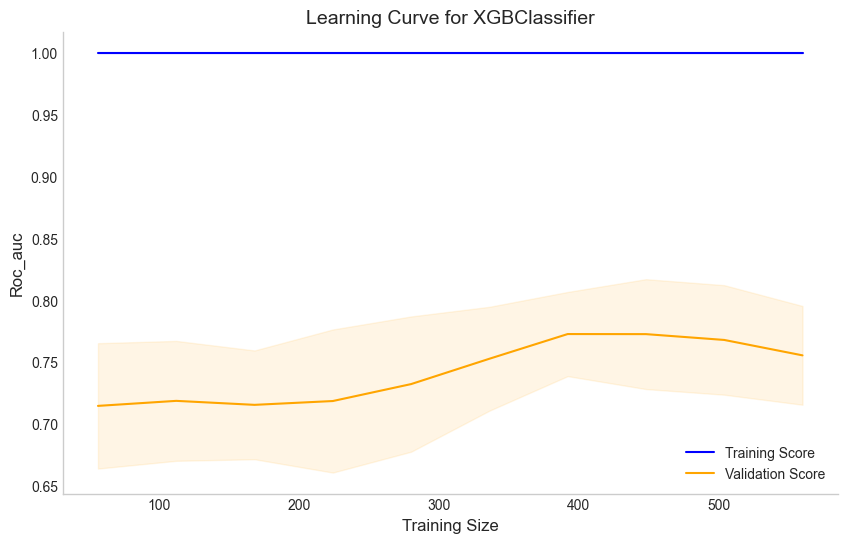

In [73]:
xgb_1 = train_model(xgb.XGBClassifier(random_state=RANDOM_STATE), train_df_enc_2, y_train, tag='xgb set 2', tracking=False, random_state=RANDOM_STATE)

In [77]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

voting_clf_2 = StackingClassifier(
    estimators=[
        ('svc', svc_2),
        ('log_reg', log_ref_2),
        ('xgb', xgb_1)
    ],
    final_estimator=LogisticRegression()
)

voting_clf_2 = train_model(voting_clf_2, train_df_enc_2, y_train, tag='voting clf set 2', tracking=False, random_state=RANDOM_STATE)

/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Training dataset: voting clf set 2


/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has fea

Training scores: ROC AUC=0.7856, F1=0.8529


/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2684: UserWarning: X has fea

KeyboardInterrupt: 

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

for model in [
    DummyClassifier(strategy='stratified'),
    LinearSVC(random_state=RANDOM_STATE),
    SVC(kernel='rbf', random_state=RANDOM_STATE),
    RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE),
    LogisticRegression(random_state=RANDOM_STATE)
]:
    print(f"Learning curve for {model.__class__.__name__}")
    plot_learning_curve(model, train_df_enc, y_train, cv=5, scoring='roc_auc')



train function

Set up mlflow tracking URI and experiment name

model searfch spaces

In [31]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# Example with SVC
svc_space = {
    'C': Real(0.1, 100, prior='log-uniform'),
    'gamma': Real(1e-4, 1, prior='log-uniform'),
    'kernel': Categorical(['rbf', 'poly', 'linear', 'sigmoid']),
    'tol': Real(1e-4, 1e-1, prior='log-uniform') 
}


log_reg_space = {
    'penalty': Categorical(['l1', 'l2']),
    'C': Real(0.01, 100, prior='log-uniform'),
    'solver': Categorical(['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']),
    'max_iter': Integer(100, 3000)
}

xgb_space = {
    'n_estimators': Integer(50, 1000),
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'min_child_weight': Integer(1, 10),
    'subsample': Real(0.5, 1.0)
}

In [71]:
import xgboost as xgb

In [72]:
xgb_clf = xgb.XGBClassifier(random_state=RANDOM_STATE)
xgb_bayes_search = BayesSearchCV(
    estimator=xgb_clf,
    search_spaces=xgb_space,
    n_iter=30,
    scoring='roc_auc',
    cv=5,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=2
)

NameError: name 'BayesSearchCV' is not defined

In [32]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
svc_tuned = BayesSearchCV(SVC(), svc_space, n_iter=50, cv=5, scoring='roc_auc', random_state=RANDOM_STATE)
log_reg_tuned = BayesSearchCV(LogisticRegression(random_state=RANDOM_STATE), log_reg_space, n_iter=50, cv=5, scoring='roc_auc', random_state=RANDOM_STATE)

In [34]:
svc_tuned.fit(train_df_enc, y_train)
#log_reg_tuned.fit(train_df_enc, y_train)

,estimator,SVC()
,search_spaces,"{'C': Real(low=0.1,...m='normalize'), 'gamma': Real(low=0.00...m='normalize'), 'kernel': Categorical(c...), prior=None), 'tol': Real(low=0.00...m='normalize')}"
,optimizer_kwargs,None
,n_iter,50
,scoring,'roc_auc'
,fit_params,None
,n_jobs,1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,5


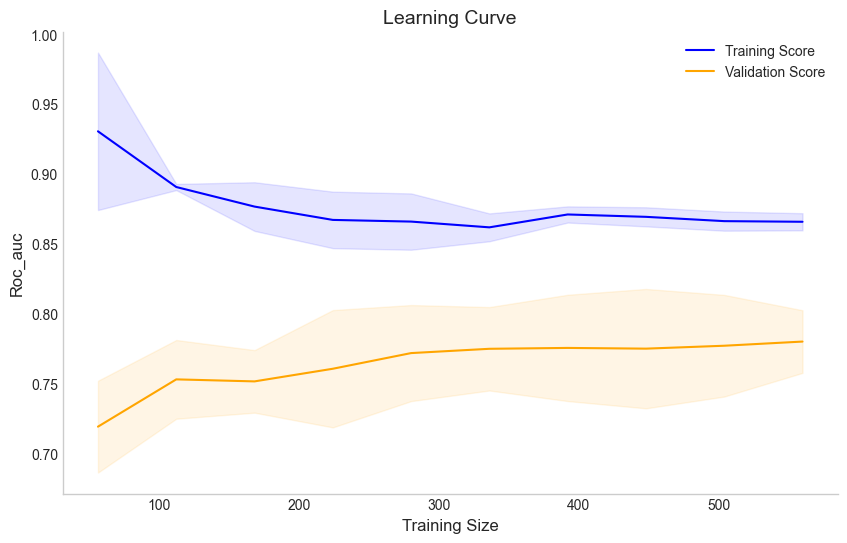

In [35]:
plot_learning_curve(svc_tuned.best_estimator_, train_df_enc, y_train, cv=5, scoring='roc_auc')


In [ ]:
plot_learning_curve(log_reg_tuned, train_df_enc, y_train, cv=5, scoring='roc_auc')

In [ ]:
svc_param_grid = {
    
}

In [ ]:
mlflow.set_tracking_uri("file://" + str(home / "mlruns"))
mlflow.set_experiment("credit-risk")

/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/mlflow/tracking/_tracking_service/utils.py:178: FutureWarning: The filesystem tracking backend (e.g., './mlruns') will be deprecated in February 2026. Consider transitioning to a database backend (e.g., 'sqlite:///mlflow.db') to take advantage of the latest MLflow features. See https://github.com/mlflow/mlflow/issues/18534 for more details and migration guidance. For migrating existing data, https://github.com/mlflow/mlflow-export-import can be used.
  return FileStore(store_uri, store_uri)
2026/01/03 17:58:41 INFO mlflow.tracking.fluent: Experiment with name 'credit-risk' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///Users/fotisn/code/repos/credit-risk-svm/mlruns/715366904169799511', creation_time=1767455921477, experiment_id='715366904169799511', last_update_time=1767455921477, lifecycle_stage='active', name='credit-risk', tags={}>

In [17]:
from sklearn.model_selection import cross_val_score
from datetime import datetime
import warnings

def train_model(X_train, y_train, model, cv=5, scoring="roc_auc", random_state=RANDOM_STATE, run_name=None, **config):
    """
    Train a model and log everything to MLflow.
    
    Parameters:
    -----------
    X_train : array-like - Training features
    y_train : array-like - Training target
    model : sklearn estimator - Model instance to train
    cv : int - Number of cross-validation folds
    scoring : str - Scoring metric for CV
    random_state : int - Random state for reproducibility
    run_name : str, optional - Custom run name. If None, auto-generates from model name + timestamp
    **config : dict - Additional model parameters
    
    Returns:
    --------
    tuple: (trained_model, cv_scores)
    """
    # Get model class name
    model_name = model.__class__.__name__
    
    # Generate run name: ModelName_YYYYMMDD_HHMMSS
    if run_name is None:
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        run_name = f"{model_name}_{timestamp}"
    
    with mlflow.start_run(run_name=run_name):

        
        
        
        
        # Perform cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring)
        
        
        
        # Log individual fold scores
        for i, score in enumerate(cv_scores):
            mlflow.log_metric(f"cv_fold_{i+1}_{scoring}", score)
        
        # Fit model on full training data
        model.fit(X_train, y_train)
        
        #
        
        print(f"✅ {run_name} | CV {scoring}: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
        
        return model, cv_scores

### First baseline

In [19]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier

# Define models and their configs
models_configs = [
    (DummyClassifier(), {"strategy": "most_frequent"}),
    (LinearSVC(), {}),
    (SVC(), {"kernel": "rbf"}),
    (RandomForestClassifier(), {}),
]

# Train all models with MLflow logging
results = {}
for model, config in models_configs:
    trained_model, cv_scores = train_model(
        train_df_enc, 
        y_train, 
        model, 
        cv=5, 
        scoring="roc_auc",
        **config
    )
    results[model.__class__.__name__] = {
        "model": trained_model,
        "cv_mean": cv_scores.mean(),
        "cv_std": cv_scores.std()
    }
    print(f"{model.__class__.__name__}: mean CV score = {cv_scores.mean():.4f}, std = {cv_scores.std():.4f}")

2026/01/04 16:04:25 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/01/04 16:04:25 INFO mlflow.store.db.utils: Updating database tables
2026/01/04 16:04:25 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/04 16:04:25 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/01/04 16:04:25 INFO mlflow.store.db.utils: Updating database tables
2026/01/04 16:04:25 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/04 16:04:25 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/01/04 16:04:25 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/04 16:04:25 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/01/04 16:04:25 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/04 16:04:25 INFO alembic.runtime.migration: Will assume non-transactional DDL.


✅ DummyClassifier_20260104_160425 | CV roc_auc: 0.5000 ± 0.0000
DummyClassifier: mean CV score = 0.5000, std = 0.0000
✅ LinearSVC_20260104_160425 | CV roc_auc: 0.7721 ± 0.0184
LinearSVC: mean CV score = 0.7721, std = 0.0184
✅ SVC_20260104_160425 | CV roc_auc: 0.7868 ± 0.0366
SVC: mean CV score = 0.7868, std = 0.0366
✅ RandomForestClassifier_20260104_160425 | CV roc_auc: 0.7802 ± 0.0398
RandomForestClassifier: mean CV score = 0.7802, std = 0.0398
✅ RandomForestClassifier_20260104_160425 | CV roc_auc: 0.7802 ± 0.0398
RandomForestClassifier: mean CV score = 0.7802, std = 0.0398


In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier

# Define models and their configs
models_configs = [
    (DummyClassifier(), {"strategy": "most_frequent"}),
    (LinearSVC(), {}),
    (SVC(), {"kernel": "rbf"}),
    (RandomForestClassifier(), {}),
]

# Train all models with MLflow logging
results = {}
for model, config in models_configs:
    trained_model, cv_scores = train_model(
        train_df_enc, 
        y_train, 
        model, 
        cv=5, 
        scoring="roc_auc",
        **config
    )
    results[model.__class__.__name__] = {
        "model": trained_model,
        "cv_mean": cv_scores.mean(),
        "cv_std": cv_scores.std()
    }
    print(f"{model.__class__.__name__}: mean CV score = {cv_scores.mean():.4f}, std = {cv_scores.std():.4f}")

✅ DummyClassifier_20260104_150507 | CV roc_auc: 0.5000 ± 0.0000
DummyClassifier: mean CV score = 0.5000, std = 0.0000
✅ LinearSVC_20260104_150507 | CV roc_auc: 0.7774 ± 0.0173
LinearSVC: mean CV score = 0.7774, std = 0.0173
✅ SVC_20260104_150507 | CV roc_auc: 0.7761 ± 0.0356
SVC: mean CV score = 0.7761, std = 0.0356
✅ RandomForestClassifier_20260104_150507 | CV roc_auc: 0.7876 ± 0.0319
RandomForestClassifier: mean CV score = 0.7876, std = 0.0319
✅ RandomForestClassifier_20260104_150507 | CV roc_auc: 0.7876 ± 0.0319
RandomForestClassifier: mean CV score = 0.7876, std = 0.0319


In [20]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

# Example with SVC
search_spaces = {
    'C': Real(0.1, 100, prior='log-uniform'),
    'gamma': Real(1e-4, 1, prior='log-uniform'),
    'kernel': Categorical(['rbf', 'poly', 'linear']),
    'tol': Real(1e-4, 1e-1, prior='log-uniform') 
}

opt = BayesSearchCV(SVC(), search_spaces, n_iter=20, cv=5, scoring='roc_auc')
opt.fit(train_df_enc, y_train)

,estimator,SVC()
,search_spaces,"{'C': Real(low=0.1,...m='normalize'), 'gamma': Real(low=0.00...m='normalize'), 'kernel': Categorical(c...), prior=None), 'tol': Real(low=0.00...m='normalize')}"
,optimizer_kwargs,None
,n_iter,20
,scoring,'roc_auc'
,fit_params,None
,n_jobs,1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,5


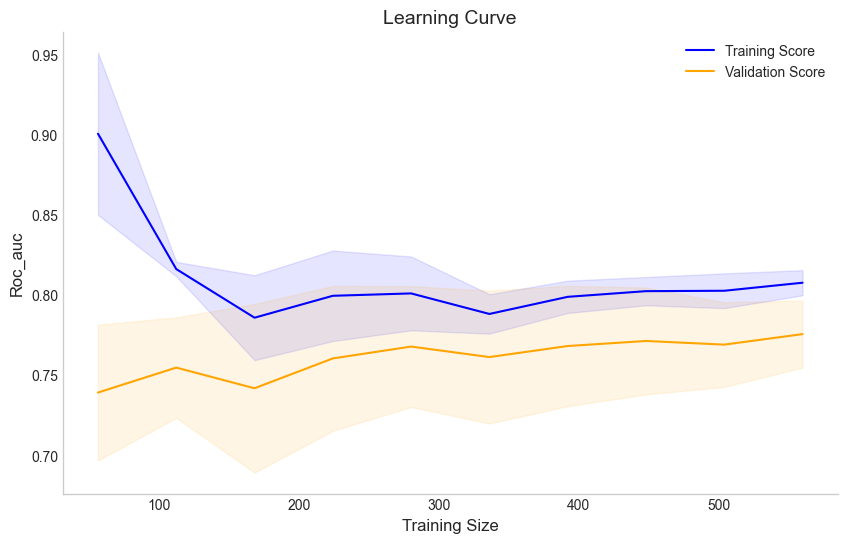

In [21]:
plot_learning_curve(opt.best_estimator_, train_df_enc, y_train, cv=5, scoring='roc_auc')

In [23]:
print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(train_df_enc, y_train))
print("best params: %s" % str(opt.best_params_))

val. score: 0.7756182152830667
test score: 0.8061882512034393
best params: OrderedDict({'C': 70.25239282701969, 'gamma': 0.00010372058615264094, 'kernel': 'rbf', 'tol': 0.004072240152994773})


### Detailed enginnering feture by feature

1 - checking account status - Weight of evidence encoding

### Base models on engineered dataset

Scale for SVM

### Second baseline

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


base_dummy = DummyClassifier(strategy="most_frequent")
base_svc = LinearSVC()
base_svc_rbf = SVC(kernel="rbf")
base_rf = RandomForestClassifier()

base_dummy.fit(train_df_enc, y_train)
base_svc.fit(train_df_enc, y_train)
base_svc_rbf.fit(train_df_enc, y_train)
base_rf.fit(train_df_enc, y_train)

score_1 = cross_val_score(base_dummy, train_df_enc, y_train, cv=5, scoring="roc_auc").mean()
score_2 = cross_val_score(base_svc, train_df_enc, y_train, cv=5, scoring="roc_auc").mean()
score_3 = cross_val_score(base_svc_rbf, train_df_enc, y_train, cv=5, scoring="roc_auc").mean()
score_4 = cross_val_score(base_rf, train_df_enc, y_train, cv=5, scoring="roc_auc").mean()

print(f"Dummy score : {score_1}", "\n", f"Linear SVM score : {score_2}", "\n", f"RBF SVM score : {score_3}", "\n", f"Random Forest score : {score_4}")

Dummy score : 0.5 
 Linear SVM score : 0.777379944148261 
 RBF SVM score : 0.7760561563848692 
 Random Forest score : 0.7743714775323686


In [ ]:

base_svc = LinearSVC()
base_svc_rbf = SVC(kernel="rbf")
base_rf = RandomForestClassifier()

base_svc.fit(engineered_train_df, y_train)
base_svc_rbf.fit(engineered_train_df, y_train)
base_rf.fit(engineered_train_df, y_train)

score_2 = cross_val_score(base_svc, engineered_train_df, y_train, cv=5, scoring="accuracy").mean()
score_3 = cross_val_score(base_svc_rbf, engineered_train_df, y_train, cv=5, scoring="accuracy").mean()
score_4 = cross_val_score(base_rf, engineered_train_df, y_train, cv=5, scoring="accuracy").mean()

print(f"Linear SVM score : {score_2}", "\n", f"RBF SVM score : {score_3}", "\n", f"Random Forest score : {score_4}")

Linear SVM score : 0.75 
 RBF SVM score : 0.7442857142857143 
 Random Forest score : 0.7757142857142856


In [ ]:
from sklearn.model_selection import GridSearchCV

# Linear SVM tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'class_weight': ['balanced', {0: 1, 1: 5}],
    'max_iter': [2000]
}

grid = GridSearchCV(
    LinearSVC(),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid.fit(engineered_train_df, y_train)

print(f"Best AUC: {grid.best_score_:.4f}")
print(f"Best params: {grid.best_params_}")

# Expected: 0.80-0.82 AUC after tuning

Best AUC: 0.7878
Best params: {'C': 1, 'class_weight': 'balanced', 'max_iter': 2000}


/home/fotis/anaconda3/envs/cl-ml-ds/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/fotis/anaconda3/envs/cl-ml-ds/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/fotis/anaconda3/envs/cl-ml-ds/lib/python3.12/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/fotis/anaconda3/envs/cl-ml-ds/lib/pytho

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, X, y):
    """
    Diagnose if you need more data, better features, or tuning
    """
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y,
        cv=5,
        scoring='roc_auc',
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )
    
    train_mean = train_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    val_mean = val_scores.mean(axis=1)
    val_std = val_scores.std(axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, val_mean, label='Validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
    plt.xlabel('Training Set Size')
    plt.ylabel('AUC Score')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Diagnosis
    gap = train_mean[-1] - val_mean[-1]
    
    print("\n🔍 DIAGNOSIS:")
    if val_mean[-1] < 0.70:
        print("❌ Low validation score - Need better features or different model")
    if gap > 0.10:
        print("⚠️  High variance (overfitting) - Need regularization or more data")
    if gap < 0.05 and val_mean[-1] < 0.75:
        print("⚠️  High bias (underfitting) - Need more complex model or better features")
    if val_mean[-1] > 0.75 and gap < 0.10:
        print("✅ Good bias-variance tradeoff - Ready for tuning")




Learning curve for DummyClassifier


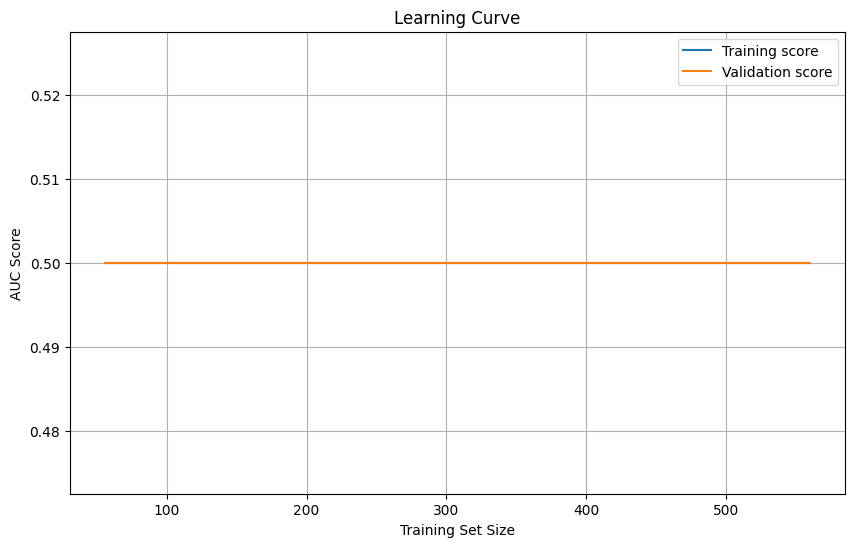


🔍 DIAGNOSIS:
❌ Low validation score - Need better features or different model
⚠️  High bias (underfitting) - Need more complex model or better features

Learning curve for LinearSVC


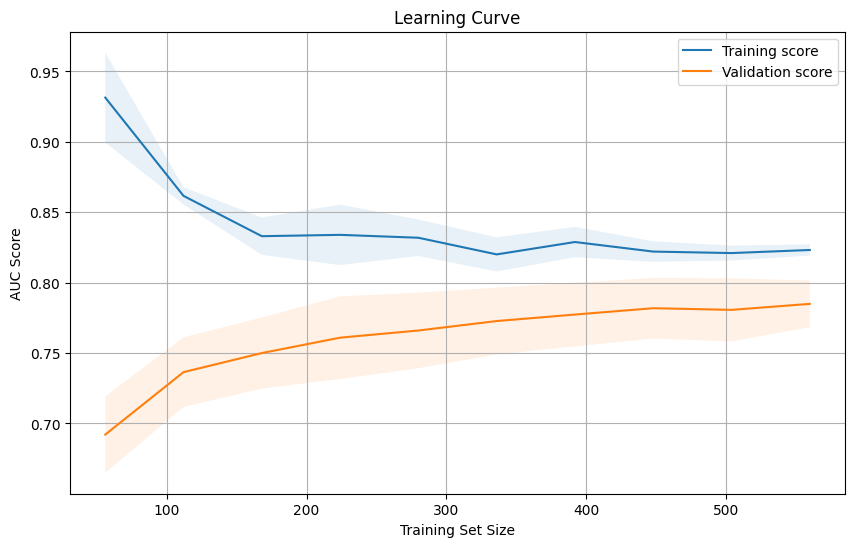


🔍 DIAGNOSIS:
✅ Good bias-variance tradeoff - Ready for tuning

Learning curve for SVC


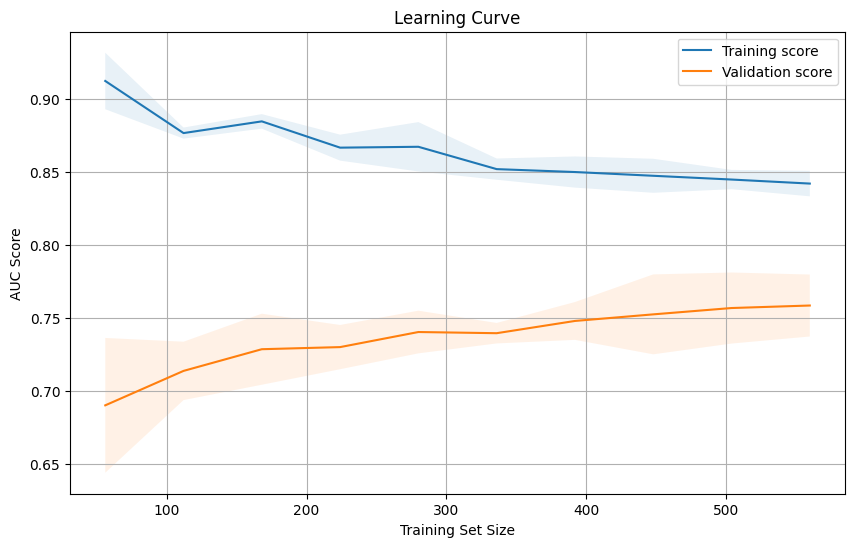


🔍 DIAGNOSIS:
✅ Good bias-variance tradeoff - Ready for tuning

Learning curve for RandomForestClassifier


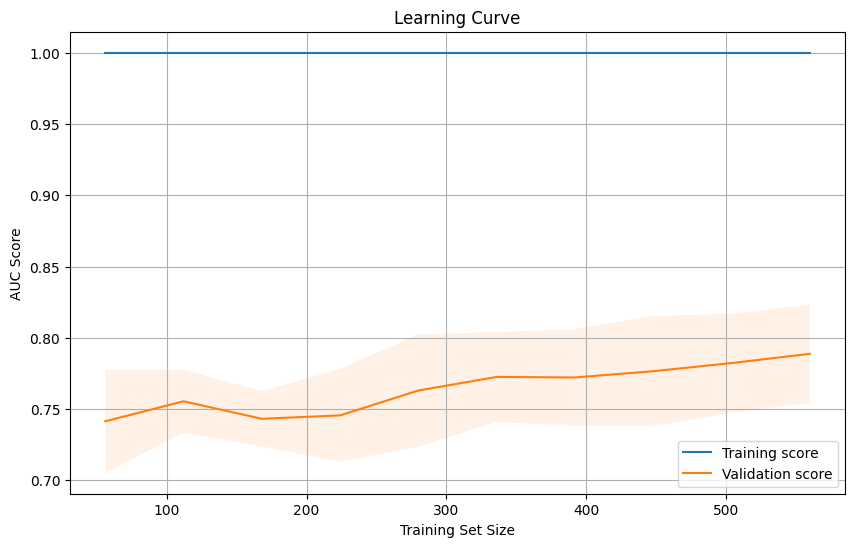


🔍 DIAGNOSIS:
⚠️  High variance (overfitting) - Need regularization or more data


In [ ]:
# Run for your best model
for model in [base_dummy ,base_svc, base_svc_rbf, base_rf]:
    print(f"\nLearning curve for {model.__class__.__name__}")
    plot_learning_curve(model, engineered_train_df, y_train)


In [ ]:
pd.DataFrame(base_rf.feature_importances_, index=engineered_train_df.columns, columns=["importance"]).sort_values(by="importance", ascending=False)

,importance
monthly_burden,0.156934
pct_x_amount,0.152426
checking_account_status,0.122144
duration_squared,0.116522
present_employment_since,0.063100
age_group,0.053683
credit_history,0.049416
savings_map,0.038616
other_installment_plans,0.031304
sex_map_male,0.024253


In [ ]:
engineered_train_df[[ "duration_squared", "monthly_burden", "pct_x_amount"]].corr()

,duration_squared,monthly_burden,pct_x_amount
duration_squared,1.000000,-0.073044,0.625180
monthly_burden,-0.073044,1.000000,0.219698
pct_x_amount,0.625180,0.219698,1.000000


In [ ]:
cols_to_drop

['other_debtors_guarantors',
 'job',
 'telephone',
 'foreign_worker',
 'present_residence_since',
 'existing_credits_count',
 'people_liable_for_maintenance']

In [ ]:
# Categorize your variables first
ordinal_vars = [
    'checking_account',      # Clear risk order
    'credit_history',        # VERY clear risk order
    'savings_account',       # Amount ranges
    'employment',            # Duration ranges
    'other_installment_plans', # None < Bank < Stores
    'job'                    # Skill level order
]

nominal_vars = [
    'purpose',              # No natural order
    'personal_status_sex',  # Categorical combinations
    'other_debtors',        # Types of support
    'property',             # Different asset types
    'housing'               # Different situations
]

binary_vars = [
    'telephone',            # Yes/No
    'foreign_worker'        # Yes/No
]

# Apply WoE to ordinal
for var in ordinal_vars:
    woe_map, woe_table = calculate_woe(df, var, 'target')
    df[f'{var}_woe'] = df[var].map(woe_map)
    
    # Calculate IV to check predictive power
    iv = calculate_iv(woe_table)
    print(f"{var} IV: {iv:.4f}")

# Apply One-Hot to nominal
for var in nominal_vars:
    df_temp = pd.get_dummies(df[var], prefix=var, drop_first=True)
    df = pd.concat([df, df_temp], axis=1)

# Binary variables stay as 0/1
# (already encoded in dataset)


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Automatically select categorical columns
categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

encoder = OneHotEncoder(
    categories="auto",
    drop="first",  # to return k-1, use drop=false to return k dummies
    sparse_output=False,
    handle_unknown="error",  # helps deal with rare labels
)


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ])

preprocessor.set_output(transform="pandas")

preprocessor.fit(train_df)

### Engineering pipeline

### Testing

<hr>